In [1]:
from corda import reaction_confidence
import magic
import scprep
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
import cv2
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [2]:
X = pd.read_csv("../ScaledData_kmeans_Class_uMAP_C.csv")

In [3]:
X = scprep.transform.sqrt(X)
X

,RN7SK,A1BG,A1BG-AS1,A4GALT,AAAS,AACS,AADAT,PRXL2C,AAGAB,AAK1,...,PMS2P5,RP11-805J14.5,TRIM15,SCGB1D2,RP11-95M15.1,AC005546.2,PRAM1,BSN-DT,RP11-686G8.1,CTD-3193O13.1
0,0.000000,0.000000,0.000000,0.000000,0.697514,0.348757,0.246609,0.652465,0.652465,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.672725,0.795978,0.000000,0.300852,1.125683,0.601703,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.426628,0.000000,0.426628,0.000000,0.000000,1.000532,0.000000,0.674559,0.798149,0.301672,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.441821,0.000000,0.000000,0.312415,0.624829,0.937244,0.000000,0.826571,0.826571,0.312415,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.551936,0.000000,0.637321,0.000000,0.318660,0.318660,0.000000,0.000000,1.056877,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.793251,0.000000,1.121827,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.369927,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [4]:
magic_operator = magic.MAGIC(t=3,knn=6)
X2 = magic_operator.fit_transform(X)
X2

Calculating MAGIC...
  Running MAGIC on 104 cells and 16038 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.19 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.24 seconds.
  Running MAGIC with `solver='exact'` on 16038-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.46 seconds.


C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\magic.py:500 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


,RN7SK,A1BG,A1BG-AS1,A4GALT,AAAS,AACS,AADAT,PRXL2C,AAGAB,AAK1,...,PMS2P5,RP11-805J14.5,TRIM15,SCGB1D2,RP11-95M15.1,AC005546.2,PRAM1,BSN-DT,RP11-686G8.1,CTD-3193O13.1
0,0.061972,0.024974,0.061590,0.093379,0.509489,0.491265,0.121755,0.444447,0.664473,0.175298,...,0.010770,0.019095,0.050542,0.017246,0.006716,0.019514,0.007361,0.014417,0.013273,0.008725
1,0.063326,0.023554,0.061975,0.093025,0.509505,0.491309,0.121415,0.444339,0.670244,0.177193,...,0.010694,0.019519,0.047554,0.017089,0.006280,0.018045,0.006912,0.014478,0.012469,0.008752
2,0.065022,0.020847,0.063212,0.089972,0.509098,0.487831,0.122057,0.444944,0.678801,0.180996,...,0.010073,0.019690,0.041960,0.016625,0.005066,0.013497,0.005341,0.014625,0.011858,0.007764
3,0.068265,0.019109,0.063431,0.088895,0.502171,0.478011,0.123306,0.445797,0.698633,0.185524,...,0.006628,0.018962,0.031945,0.014192,0.002894,0.008754,0.003517,0.014547,0.010826,0.004517
4,0.068402,0.018430,0.063758,0.088686,0.506928,0.492090,0.122346,0.446062,0.694364,0.184723,...,0.009456,0.020130,0.035859,0.015910,0.003893,0.010106,0.004204,0.014593,0.010806,0.007063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.050865,0.027632,0.060415,0.097093,0.522676,0.546876,0.130988,0.444253,0.637222,0.151559,...,0.020951,0.022041,0.086391,0.026635,0.016045,0.030646,0.012243,0.015686,0.017369,0.021720
100,0.063184,0.022829,0.066013,0.094987,0.502812,0.474392,0.118653,0.437635,0.659345,0.168248,...,0.008787,0.018172,0.043766,0.016998,0.004787,0.015424,0.006097,0.015243,0.014959,0.006081
101,0.031070,0.051813,0.038880,0.084965,0.519224,0.305104,0.139499,0.365353,0.429203,0.195790,...,0.004911,0.010135,0.060797,0.008974,0.006144,0.055374,0.012326,0.007534,0.013401,0.006923
102,0.041111,0.023106,0.044673,0.089740,0.506680,0.320781,0.127132,0.381531,0.503075,0.195172,...,0.004290,0.011211,0.036619,0.007758,0.002488,0.021537,0.007080,0.007345,0.010149,0.003436


In [5]:
magic_operator2 = magic.MAGIC(t='auto',knn=6)
X3 = magic_operator2.fit_transform(X)
X3

Calculating MAGIC...
  Running MAGIC on 104 cells and 16038 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.20 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.25 seconds.
  Running MAGIC with `solver='exact'` on 16038-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...


C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\magic.py:500 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


    Automatically selected t = 7
  Calculated imputation in 6.25 seconds.
Calculated MAGIC in 7.68 seconds.


C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


,RN7SK,A1BG,A1BG-AS1,A4GALT,AAAS,AACS,AADAT,PRXL2C,AAGAB,AAK1,...,PMS2P5,RP11-805J14.5,TRIM15,SCGB1D2,RP11-95M15.1,AC005546.2,PRAM1,BSN-DT,RP11-686G8.1,CTD-3193O13.1
0,0.060760,0.023836,0.060485,0.092165,0.508970,0.479014,0.121917,0.439158,0.652892,0.178069,...,0.010470,0.018926,0.048722,0.016686,0.006389,0.018908,0.007180,0.013908,0.012722,0.008607
1,0.061003,0.023658,0.060595,0.092078,0.508896,0.479359,0.121899,0.439394,0.654208,0.178270,...,0.010427,0.018971,0.048303,0.016658,0.006308,0.018631,0.007089,0.013930,0.012655,0.008549
2,0.061311,0.023281,0.060680,0.091820,0.508511,0.478135,0.121967,0.439345,0.655638,0.178963,...,0.010202,0.018947,0.047107,0.016460,0.006051,0.017964,0.006840,0.013910,0.012499,0.008294
3,0.062016,0.022539,0.060855,0.091271,0.507441,0.474967,0.122166,0.439214,0.658985,0.180568,...,0.009601,0.018841,0.044295,0.015950,0.005435,0.016504,0.006269,0.013855,0.012153,0.007628
4,0.061940,0.022865,0.060964,0.091595,0.508160,0.478874,0.121952,0.439999,0.659221,0.179491,...,0.010038,0.019029,0.045944,0.016353,0.005816,0.017223,0.006584,0.013966,0.012342,0.008085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.058880,0.026545,0.060431,0.094425,0.512828,0.497074,0.121003,0.441968,0.646932,0.171153,...,0.012906,0.019561,0.059652,0.018911,0.008840,0.024091,0.009295,0.014353,0.014133,0.011250
100,0.060872,0.023466,0.060482,0.091920,0.508318,0.475278,0.122075,0.438420,0.652731,0.178919,...,0.010058,0.018743,0.047105,0.016321,0.006009,0.018159,0.006870,0.013826,0.012576,0.008151
101,0.052405,0.025618,0.054428,0.090308,0.508004,0.423123,0.125153,0.417967,0.592381,0.184601,...,0.008532,0.016113,0.047041,0.013926,0.005595,0.022062,0.007454,0.011710,0.012357,0.007257
102,0.054835,0.023676,0.055731,0.089901,0.506656,0.427918,0.124668,0.421359,0.607255,0.185875,...,0.008097,0.016482,0.043030,0.013677,0.004826,0.018893,0.006527,0.011964,0.011840,0.006587


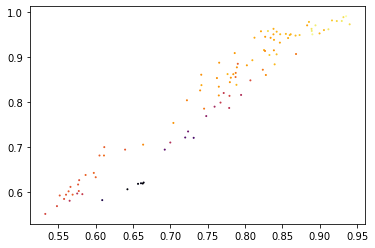

C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\plot.py:120 MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\plot.py:130 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
C:\Users\santi\AppData\Roaming\Python\Python37\site-packages\magic\utils.py:135 FutureWarning: The SparseDataFrame class is removed from pan

In [5]:
pyplot.scatter(X2['MKI67'], X2['FOXM1'], c=X2['KRAS'], s=1, cmap='inferno')
pyplot.show()
magic.plot.animate_magic(X, gene_x='MKI67', gene_y='FOXM1', gene_color='KRAS', operator=magic_operator)

In [5]:
alpha = 0.05
normales = {}
non_normales = {}
for c in X2.columns:
    stat, p = shapiro(X2[c])
    stat2, p2 = normaltest(X2[c])
    if p>alpha and p2>alpha:
        normales[c]=(stat,stat2,np.mean(X2[c]),np.std(X2[c]))
    else:
        non_normales[c]=(stat,stat2)

In [6]:
print(len(non_normales))

15303


In [7]:
binznn = {}
binzn = {}
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_PP_CENTERS#cv2.KMEANS_RANDOM_CENTERS

for c in non_normales.keys():
    temp = np.float32(X2[c])
    compactness,labels,centers = cv2.kmeans(temp,2,None,criteria,10,flags)
    binznn[c]=labels

In [8]:
maxx = 0
for i in binznn.keys():
    temp = np.float32(X2[i])
    maxx = max(temp)
    for j in range(len(temp)):
        if temp[j]==maxx:
            try:
                if binznn[i][j][0]==1:
                    binznn[i]=np.mean(binznn[i])
                else:
                    binznn[i]=1-np.mean(binznn[i])
            except:
                print(i)

In [9]:
ccc=0
for i in binznn:
    if binznn[i]>0.8:
        ccc+=1
print(ccc)

4944


In [10]:
Data=[]
for i in normales.keys():
    Data.append(np.float32(X2[i]))

In [11]:
#dendrogram = sch.dendrogram(sch.linkage(Data, method = 'ward'))

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')
y_hc = hc.fit_predict(Data)

In [13]:
classes = []
for it in range(0,5):
    mn = 0; std=0; bmn=0; bstd=0; bms=0;
    classes.append([])
    for x,i in enumerate(normales.keys()):
        if y_hc[x]==it:
            mn = np.mean(X2[i])
            std = np.std(X2[i])
            if (mn/std)>bms:
                bms=mn/std
                bmn=mn
                bstd=std
            classes[it].append((X2[i],i))

    for c in classes[it]:
        temp = np.float32(c[0])
        binzn[c[1]]=[]
        for j in temp:
            if j>=(bmn):
                binzn[c[1]].append(1)
            else:
                binzn[c[1]].append(0)
        binzn[c[1]]=np.mean(binzn[c[1]])

In [14]:
zero=[]
uno=[]
dos=[]
tres=[]
cuatro=[]
#cinco=[]
for x,i in enumerate(y_hc):
    if i==0:
        zero.append((np.mean(Data[x]),np.std(Data[x])))
    if i==1:
        uno.append((np.mean(Data[x]),np.std(Data[x])))
    if i==2:
        dos.append((np.mean(Data[x]),np.std(Data[x])))
    if i==3:
        tres.append((np.mean(Data[x]),np.std(Data[x])))
    if i==4:
        cuatro.append((np.mean(Data[x]),np.std(Data[x])))
    #if i==5:
    #    cinco.append((np.mean(Data[x]),np.std(Data[x])))


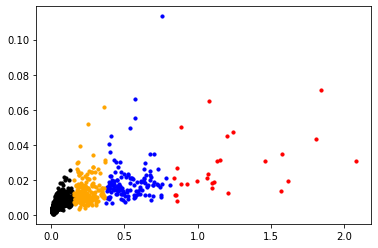

In [15]:
pyplot.scatter([i[0] for i in zero], [i[1] for i in zero], s = 10, c = 'red', label = 'Cluster 1')
pyplot.scatter([i[0] for i in uno], [i[1] for i in uno], s = 10, c = 'blue', label = 'Cluster 2')
#pyplot.scatter([i[0] for i in dos], [i[1] for i in dos], s = 10, c = 'green', label = 'Cluster 3')
pyplot.scatter([i[0] for i in tres], [i[1] for i in tres], s = 10, c = 'black', label = 'Cluster 4')
pyplot.scatter([i[0] for i in cuatro], [i[1] for i in cuatro], s = 10, c = 'orange', label = 'Cluster 5')
#pyplot.scatter([i[0] for i in cinco], [i[1] for i in cinco], s = 10, c = 'pink', label = 'Cluster 6')


In [16]:
binz = {**binzn,**binznn}

In [17]:
G = pd.read_csv("../HugoV2.csv")

In [18]:
h2n = {}
for x,i in enumerate(G['Name']):
    h2n[i.strip()]=G['Hugo'][x].strip()

In [19]:
hbin = {}
for k  in h2n:
    if k in binz:
        hbin[h2n[k]]=binz[k]
hbin

{'HGNC:5': 0.16346153846153846,
 'HGNC:37133': 0.8942307692307693,
 'HGNC:18149': 0.3173076923076923,
 'HGNC:13666': 0.40384615384615385,
 'HGNC:21298': 0.8173076923076923,
 'HGNC:17929': 0.2980769230769231,
 'HGNC:25662': 0.8461538461538461,
 'HGNC:19679': 0.7211538461538461,
 'HGNC:30205': 0.38461538461538464,
 'HGNC:18': 0.8173076923076923,
 'HGNC:15886': 0.6346153846153846,
 'HGNC:33842': 0.75,
 'HGNC:20': 0.875,
 'HGNC:21022': 0.6923076923076923,
 'HGNC:28417': 0.17307692307692313,
 'HGNC:23993': 0.8076923076923077,
 'HGNC:14235': 0.8365384615384616,
 'HGNC:19235': 0.6057692307692308,
 'HGNC:23': 0.8269230769230769,
 'HGNC:32': 0.3557692307692308,
 'HGNC:33': 0.6442307692307692,
 'HGNC:34': 0.8076923076923077,
 'HGNC:35': 0.32692307692307687,
 'HGNC:37': 0.0,
 'HGNC:31': 0.8173076923076923,
 'HGNC:14637': 0.33653846153846156,
 'HGNC:32972': 0.6153846153846154,
 'HGNC:45': 0.17307692307692307,
 'HGNC:47': 0.7884615384615384,
 'HGNC:48': 0.6442307692307692,
 'HGNC:49': 0.80769230769

In [20]:
for i in hbin.keys():
    print(i,'\t',hbin[i])

HGNC:5 	 0.16346153846153846
HGNC:37133 	 0.8942307692307693
HGNC:18149 	 0.3173076923076923
HGNC:13666 	 0.40384615384615385
HGNC:21298 	 0.8173076923076923
HGNC:17929 	 0.2980769230769231
HGNC:25662 	 0.8461538461538461
HGNC:19679 	 0.7211538461538461
HGNC:30205 	 0.38461538461538464
HGNC:18 	 0.8173076923076923
HGNC:15886 	 0.6346153846153846
HGNC:33842 	 0.75
HGNC:20 	 0.875
HGNC:21022 	 0.6923076923076923
HGNC:28417 	 0.17307692307692313
HGNC:23993 	 0.8076923076923077
HGNC:14235 	 0.8365384615384616
HGNC:19235 	 0.6057692307692308
HGNC:23 	 0.8269230769230769
HGNC:32 	 0.3557692307692308
HGNC:33 	 0.6442307692307692
HGNC:34 	 0.8076923076923077
HGNC:35 	 0.32692307692307687
HGNC:37 	 0.0
HGNC:31 	 0.8173076923076923
HGNC:14637 	 0.33653846153846156
HGNC:32972 	 0.6153846153846154
HGNC:45 	 0.17307692307692307
HGNC:47 	 0.7884615384615384
HGNC:48 	 0.6442307692307692
HGNC:49 	 0.8076923076923077
HGNC:50 	 0.22115384615384615
HGNC:41 	 0.6057692307692307
HGNC:51 	 0.817307692307692

HGNC:21268 	 0.8076923076923077
HGNC:26363 	 0.6442307692307693
HGNC:25374 	 0.7788461538461539
HGNC:27880 	 0.40384615384615385
HGNC:23471 	 0.375
HGNC:23575 	 0.7692307692307692
HGNC:42024 	 0.07692307692307693
HGNC:42737 	 0.22115384615384615
HGNC:28321 	 0.8173076923076923
HGNC:24470 	 0.17307692307692307
HGNC:29424 	 0.22115384615384615
HGNC:29186 	 0.0
HGNC:25310 	 0.8173076923076923
HGNC:29024 	 0.7596153846153846
HGNC:27110 	 0.7307692307692308
HGNC:26853 	 0.5961538461538461
HGNC:27639 	 0.17307692307692307
HGNC:33736 	 0.22115384615384615
HGNC:26323 	 0.22115384615384615
HGNC:28169 	 0.4807692307692307
HGNC:29593 	 0.8557692307692308
HGNC:28640 	 0.6346153846153846
HGNC:28233 	 0.625
HGNC:26752 	 0.8269230769230769
HGNC:24786 	 0.7692307692307693
HGNC:27229 	 0.8076923076923077
HGNC:25970 	 0.2403846153846154
HGNC:29223 	 0.7019230769230769
HGNC:26614 	 0.6634615384615384
HGNC:25185 	 0.8173076923076923
HGNC:20961 	 0.8269230769230769
HGNC:24600 	 0.22115384615384615
HGNC:294

HGNC:847 	 0.8461538461538461
HGNC:23933 	 0.3076923076923077
HGNC:850 	 0.875
HGNC:868 	 0.8173076923076923
HGNC:28091 	 0.1346153846153846
HGNC:18305 	 0.8269230769230769
HGNC:851 	 0.8076923076923077
HGNC:853 	 0.23076923076923078
HGNC:854 	 0.8269230769230769
HGNC:856 	 0.8653846153846154
HGNC:18264 	 0.2980769230769231
HGNC:13527 	 0.8269230769230769
HGNC:857 	 0.8173076923076923
HGNC:18125 	 0.7115384615384616
HGNC:16832 	 0.8365384615384616
HGNC:864 	 0.2596153846153846
HGNC:18303 	 0.3076923076923077
HGNC:865 	 0.5961538461538461
HGNC:18481 	 0.7115384615384616
HGNC:866 	 0.6538461538461539
HGNC:861 	 0.8173076923076923
HGNC:13724 	 0.8173076923076923
HGNC:18266 	 0.8076923076923077
HGNC:863 	 0.8269230769230769
HGNC:21723 	 0.6153846153846154
HGNC:44180 	 0.5961538461538461
HGNC:869 	 0.28846153846153844
HGNC:870 	 0.7019230769230769
HGNC:13531 	 0.33653846153846156
HGNC:13533 	 0.7307692307692308
HGNC:3706 	 0.6346153846153846
HGNC:13534 	 0.7788461538461539
HGNC:27245 	 0.66

HGNC:1463 	 0.8173076923076923
HGNC:24190 	 0.7403846153846154
HGNC:24197 	 0.8269230769230769
HGNC:1469 	 0.17307692307692307
HGNC:1470 	 0.6057692307692307
HGNC:26276 	 0.8076923076923077
HGNC:1471 	 0.8461538461538461
HGNC:1472 	 0.27884615384615385
HGNC:19946 	 0.6346153846153846
HGNC:29188 	 0.8365384615384616
HGNC:29307 	 0.8365384615384616
HGNC:18806 	 0.8173076923076923
HGNC:18807 	 0.33653846153846156
HGNC:30688 	 0.8269230769230769
HGNC:19721 	 0.2692307692307692
HGNC:1473 	 0.7692307692307692
HGNC:20040 	 0.875
HGNC:20039 	 0.7788461538461539
HGNC:1474 	 0.6153846153846154
HGNC:1476 	 0.8269230769230769
HGNC:1479 	 0.7980769230769231
HGNC:1482 	 0.8461538461538461
HGNC:1484 	 0.6923076923076923
HGNC:1485 	 0.2980769230769231
HGNC:1486 	 0.5961538461538461
HGNC:1477 	 0.23076923076923078
HGNC:48839 	 0.11538461538461539
HGNC:16663 	 0.23076923076923078
HGNC:11182 	 0.8173076923076923
HGNC:1481 	 0.8076923076923077
HGNC:6743 	 0.625
HGNC:21259 	 0.6634615384615384
HGNC:1487 	 

HGNC:30216 	 0.21153846153846154
HGNC:24537 	 0.8173076923076923
HGNC:29865 	 0.8173076923076923
HGNC:20274 	 0.7115384615384616
HGNC:16171 	 0.8269230769230769
HGNC:30599 	 0.8269230769230769
HGNC:26942 	 0.7884615384615384
HGNC:25675 	 0.8173076923076923
HGNC:28439 	 0.5961538461538461
HGNC:1943 	 0.038461538461538464
HGNC:1944 	 0.2403846153846154
HGNC:17807 	 0.21153846153846154
HGNC:14525 	 0.7788461538461539
HGNC:17433 	 0.7980769230769231
HGNC:24291 	 0.28846153846153844
HGNC:29270 	 0.0673076923076923
HGNC:17852 	 0.8173076923076923
HGNC:13544 	 0.7019230769230769
HGNC:24168 	 0.22115384615384615
HGNC:1959 	 0.625
HGNC:1961 	 0.8173076923076923
HGNC:1964 	 0.7596153846153846
HGNC:1969 	 0.6442307692307692
HGNC:1971 	 0.6538461538461539
HGNC:13817 	 0.0
HGNC:15993 	 0.8173076923076923
HGNC:19650 	 0.0
HGNC:17422 	 0.2596153846153846
HGNC:17423 	 0.7980769230769231
HGNC:24464 	 0.6826923076923077
HGNC:18137 	 0.16346153846153846
HGNC:17198 	 0.6730769230769231
HGNC:24353 	 0.8557

HGNC:2364 	 0.6826923076923077
HGNC:17177 	 0.6153846153846154
HGNC:16148 	 0.7980769230769231
HGNC:37078 	 0.875
HGNC:15762 	 0.7980769230769231
HGNC:21299 	 0.7692307692307693
HGNC:28170 	 0.5961538461538461
HGNC:29405 	 0.6057692307692308
HGNC:2366 	 0.6153846153846154
HGNC:2379 	 0.8461538461538461
HGNC:16062 	 0.32692307692307687
HGNC:27301 	 0.6153846153846154
HGNC:26148 	 0.8269230769230769
HGNC:2384 	 0.8173076923076923
HGNC:2385 	 0.009615384615384616
HGNC:2399 	 0.8269230769230769
HGNC:356 	 0.6538461538461539
HGNC:17295 	 0.6442307692307692
HGNC:2417 	 0.16346153846153846
HGNC:18246 	 0.8461538461538461
HGNC:2418 	 0.6442307692307692
HGNC:2419 	 0.8173076923076923
HGNC:2420 	 0.16346153846153846
HGNC:2422 	 0.6538461538461539
HGNC:18966 	 0.15384615384615385
HGNC:29905 	 0.8076923076923077
HGNC:2431 	 0.6153846153846154
HGNC:2432 	 0.2403846153846154
HGNC:2438 	 0.22115384615384615
HGNC:2439 	 0.23076923076923078
HGNC:24290 	 0.3653846153846154
HGNC:24292 	 0.826923076923076

HGNC:2937 	 0.6346153846153846
HGNC:2938 	 0.23076923076923078
HGNC:2939 	 0.7692307692307692
HGNC:20188 	 0.8173076923076923
HGNC:30492 	 0.5192307692307693
HGNC:21493 	 0.6057692307692308
HGNC:26013 	 0.7980769230769231
HGNC:2949 	 0.7884615384615384
HGNC:2950 	 0.3076923076923077
HGNC:2941 	 0.6730769230769231
HGNC:2945 	 0.3269230769230769
HGNC:2946 	 0.8365384615384616
HGNC:5229 	 0.8173076923076923
HGNC:14884 	 0.8461538461538461
HGNC:11808 	 0.8269230769230769
HGNC:14885 	 0.6153846153846154
HGNC:5270 	 0.8173076923076923
HGNC:5228 	 0.8269230769230769
HGNC:14886 	 0.5769230769230769
HGNC:14887 	 0.0
HGNC:14888 	 0.7788461538461539
HGNC:6968 	 0.25961538461538464
HGNC:14889 	 0.7019230769230769
HGNC:14891 	 0.8173076923076923
HGNC:25881 	 0.07692307692307687
HGNC:20090 	 0.25
HGNC:13192 	 0.8269230769230769
HGNC:9439 	 0.7019230769230769
HGNC:39808 	 0.8173076923076923
HGNC:5271 	 0.3653846153846154
HGNC:16235 	 0.8653846153846154
HGNC:15469 	 0.125
HGNC:12392 	 0.22115384615384

HGNC:37625 	 0.875
HGNC:3274 	 0.8461538461538461
HGNC:3273 	 0.6442307692307692
HGNC:3272 	 0.6538461538461539
HGNC:13277 	 0.7692307692307693
HGNC:3270 	 0.8173076923076923
HGNC:48616 	 0.23076923076923078
HGNC:24656 	 0.8365384615384616
HGNC:44016 	 0.22115384615384615
HGNC:44017 	 0.7403846153846154
HGNC:18138 	 0.8173076923076923
HGNC:20010 	 0.6153846153846154
HGNC:24657 	 0.6826923076923077
HGNC:44976 	 0.6634615384615384
HGNC:24460 	 0.8461538461538461
HGNC:3282 	 0.125
HGNC:23946 	 0.5096153846153846
HGNC:37926 	 0.6730769230769231
HGNC:3284 	 0.8173076923076923
HGNC:18683 	 0.8461538461538461
HGNC:3285 	 0.8076923076923077
HGNC:37938 	 0.75
HGNC:37939 	 0.7788461538461539
HGNC:37940 	 0.8269230769230769
HGNC:3287 	 0.8269230769230769
HGNC:3293 	 0.8365384615384616
HGNC:31837 	 0.8269230769230769
HGNC:3288 	 0.8173076923076923
HGNC:3289 	 0.6634615384615384
HGNC:16687 	 0.5865384615384616
HGNC:3296 	 0.6153846153846154
HGNC:3297 	 0.7980769230769231
HGNC:3298 	 0.7980769230769

HGNC:25087 	 0.8173076923076923
HGNC:1333 	 0.8846153846153846
HGNC:24179 	 0.6057692307692307
HGNC:1313 	 0.3653846153846154
HGNC:26110 	 0.8173076923076923
HGNC:13247 	 0.8461538461538461
HGNC:23389 	 0.8269230769230769
HGNC:21109 	 0.375
HGNC:16949 	 0.8173076923076923
HGNC:24587 	 0.3173076923076923
HGNC:28593 	 0.8269230769230769
HGNC:28308 	 0.32692307692307687
HGNC:28629 	 0.7596153846153846
HGNC:44190 	 0.23076923076923078
HGNC:21084 	 0.6346153846153846
HGNC:25911 	 0.625
HGNC:21110 	 0.4807692307692307
HGNC:24527 	 0.8173076923076923
HGNC:29162 	 0.8269230769230769
HGNC:33716 	 0.5288461538461539
HGNC:30701 	 0.7980769230769231
HGNC:34237 	 0.21153846153846156
HGNC:25378 	 0.7884615384615384
HGNC:29320 	 0.2596153846153846
HGNC:16492 	 0.6538461538461539
HGNC:25808 	 0.7019230769230769
HGNC:19854 	 0.6634615384615384
HGNC:17865 	 0.23076923076923078
HGNC:15549 	 0.5480769230769231
HGNC:28133 	 0.6346153846153846
HGNC:28999 	 0.14423076923076922
HGNC:27016 	 0.6153846153846154

HGNC:4162 	 0.8269230769230769
HGNC:4163 	 0.8269230769230769
HGNC:16955 	 0.038461538461538464
HGNC:27475 	 0.9903846153846154
HGNC:16355 	 0.8269230769230769
HGNC:44119 	 0.8173076923076923
HGNC:4168 	 0.17307692307692307
HGNC:4166 	 0.7788461538461539
HGNC:24485 	 0.5865384615384616
HGNC:25312 	 0.23076923076923078
HGNC:4171 	 0.625
HGNC:4172 	 0.6538461538461539
HGNC:4173 	 0.19230769230769232
HGNC:4174 	 0.7980769230769231
HGNC:29941 	 0.8557692307692308
HGNC:29989 	 0.2692307692307692
HGNC:30778 	 0.625
HGNC:8849 	 0.8173076923076923
HGNC:25068 	 0.22115384615384615
HGNC:26616 	 0.21153846153846154
HGNC:4177 	 0.22115384615384615
HGNC:18986 	 0.6346153846153846
HGNC:4180 	 0.875
HGNC:4181 	 0.6923076923076923
HGNC:4182 	 0.21153846153846154
HGNC:39561 	 0.21153846153846154
HGNC:4183 	 0.21153846153846156
HGNC:4184 	 0.22115384615384615
HGNC:20480 	 0.22115384615384615
HGNC:4186 	 0.6057692307692308
HGNC:15990 	 0.8269230769230769
HGNC:4188 	 0.7980769230769231
HGNC:19095 	 0.8173

HGNC:4727 	 0.875
HGNC:4730 	 0.19230769230769232
HGNC:4735 	 0.0
HGNC:4738 	 0.5961538461538461
HGNC:14456 	 0.8846153846153846
HGNC:20507 	 0.22115384615384615
HGNC:4739 	 0.6634615384615384
HGNC:4741 	 0.6442307692307692
HGNC:20664 	 0.5961538461538461
HGNC:38013 	 0.7211538461538461
HGNC:38019 	 0.7115384615384616
HGNC:4757 	 0.6538461538461539
HGNC:4747 	 0.2692307692307692
HGNC:4753 	 0.6538461538461539
HGNC:4746 	 0.19230769230769232
HGNC:4755 	 0.625
HGNC:4756 	 0.21153846153846154
HGNC:4761 	 0.5192307692307692
HGNC:13954 	 0.8269230769230769
HGNC:4748 	 0.5961538461538461
HGNC:4749 	 0.22115384615384615
HGNC:4758 	 0.6153846153846154
HGNC:20516 	 0.6442307692307692
HGNC:4760 	 0.23076923076923078
HGNC:27867 	 0.6538461538461539
HGNC:4764 	 0.625
HGNC:4765 	 0.8269230769230769
HGNC:33164 	 0.25
HGNC:4767 	 0.6730769230769231
HGNC:4772 	 0.5769230769230769
HGNC:18982 	 0.3942307692307692
HGNC:42980 	 0.6057692307692308
HGNC:42982 	 0.8365384615384616
HGNC:42030 	 0.221153846153

HGNC:5100 	 0.75
HGNC:5101 	 0.6538461538461539
HGNC:5114 	 0.19230769230769232
HGNC:5116 	 0.6826923076923077
HGNC:5117 	 0.8269230769230769
HGNC:5118 	 0.8076923076923077
HGNC:5119 	 0.0
HGNC:5120 	 0.6923076923076923
HGNC:43749 	 0.2403846153846154
HGNC:43751 	 0.375
HGNC:5126 	 0.7692307692307692
HGNC:5128 	 0.6346153846153846
HGNC:5129 	 0.8269230769230769
HGNC:5130 	 0.8365384615384616
HGNC:5122 	 0.6153846153846154
HGNC:5123 	 0.625
HGNC:5125 	 0.9519230769230769
HGNC:43753 	 0.22115384615384615
HGNC:5139 	 0.8269230769230769
HGNC:24973 	 0.3942307692307692
HGNC:5145 	 0.8846153846153846
HGNC:5147 	 0.6442307692307692
HGNC:28242 	 0.5961538461538461
HGNC:5155 	 0.21153846153846154
HGNC:5157 	 0.6538461538461539
HGNC:5163 	 0.8173076923076923
HGNC:15597 	 0.6346153846153846
HGNC:15844 	 0.7403846153846154
HGNC:17022 	 0.6730769230769231
HGNC:18817 	 0.23076923076923078
HGNC:5164 	 0.7019230769230769
HGNC:5171 	 0.16346153846153846
HGNC:5172 	 0.6057692307692307
HGNC:5173 	 0.6634

HGNC:14361 	 0.8846153846153846
HGNC:28660 	 0.8173076923076923
HGNC:19857 	 0.8461538461538461
HGNC:29882 	 0.8173076923076923
HGNC:4053 	 0.22115384615384615
HGNC:6130 	 0.23076923076923078
HGNC:25745 	 0.8076923076923077
HGNC:18524 	 0.6730769230769231
HGNC:24254 	 0.7019230769230769
HGNC:26278 	 0.6634615384615384
HGNC:28977 	 0.21153846153846156
HGNC:29201 	 0.8269230769230769
HGNC:29821 	 0.6346153846153846
HGNC:13890 	 0.3076923076923077
HGNC:30697 	 0.0
HGNC:30879 	 0.8846153846153846
HGNC:6137 	 0.7692307692307693
HGNC:6138 	 0.7596153846153846
HGNC:6139 	 0.7884615384615384
HGNC:6141 	 0.21153846153846156
HGNC:6142 	 0.7019230769230769
HGNC:6143 	 0.7596153846153846
HGNC:6147 	 0.625
HGNC:6148 	 0.2403846153846154
HGNC:6149 	 0.36538461538461536
HGNC:6150 	 0.8076923076923077
HGNC:6153 	 0.8173076923076923
HGNC:23927 	 0.7788461538461539
HGNC:6155 	 0.34615384615384615
HGNC:44304 	 0.20192307692307693
HGNC:6157 	 0.6057692307692308
HGNC:6158 	 0.0
HGNC:6160 	 0.85576923076923

HGNC:25160 	 0.7403846153846154
HGNC:6467 	 0.8173076923076923
HGNC:19842 	 0.1923076923076923
HGNC:28420 	 0.8269230769230769
HGNC:1564 	 0.6057692307692307
HGNC:33238 	 0.27884615384615385
HGNC:6469 	 0.22115384615384615
HGNC:6470 	 0.8365384615384616
HGNC:20499 	 0.7115384615384616
HGNC:20488 	 0.6057692307692308
HGNC:18594 	 0.875
HGNC:26789 	 0.22115384615384615
HGNC:16468 	 0.8076923076923077
HGNC:18512 	 0.875
HGNC:6472 	 0.8653846153846154
HGNC:6476 	 0.2403846153846154
HGNC:26058 	 0.6346153846153846
HGNC:6481 	 0.22115384615384615
HGNC:6483 	 0.8076923076923077
HGNC:6485 	 0.21153846153846156
HGNC:6486 	 0.7211538461538461
HGNC:6487 	 0.8173076923076923
HGNC:6490 	 0.22115384615384615
HGNC:6492 	 0.7115384615384616
HGNC:6493 	 0.3942307692307692
HGNC:6494 	 0.2692307692307692
HGNC:6499 	 0.8365384615384616
HGNC:6501 	 0.8173076923076923
HGNC:14582 	 0.8173076923076923
HGNC:26068 	 0.8365384615384616
HGNC:29796 	 0.8076923076923077
HGNC:15606 	 0.8173076923076923
HGNC:33772 	 

HGNC:25505 	 0.6153846153846154
HGNC:6833 	 0.6346153846153846
HGNC:6834 	 0.6153846153846154
HGNC:6835 	 0.0
HGNC:6836 	 0.7788461538461539
HGNC:13352 	 0.8269230769230769
HGNC:34390 	 0.7596153846153846
HGNC:15715 	 0.5961538461538461
HGNC:6839 	 0.7596153846153846
HGNC:6840 	 0.7980769230769231
HGNC:6842 	 0.8173076923076923
HGNC:6843 	 0.8365384615384616
HGNC:6844 	 0.6730769230769231
HGNC:43837 	 0.625
HGNC:6845 	 0.8846153846153846
HGNC:6846 	 0.5961538461538461
HGNC:6847 	 0.7692307692307692
HGNC:6848 	 0.8269230769230769
HGNC:6854 	 0.8269230769230769
HGNC:6855 	 0.8365384615384616
HGNC:6856 	 0.8173076923076923
HGNC:6857 	 0.22115384615384615
HGNC:6858 	 0.15384615384615385
HGNC:6859 	 0.625
HGNC:6860 	 0.23076923076923073
HGNC:6861 	 0.8365384615384616
HGNC:6849 	 0.6923076923076923
HGNC:6850 	 0.875
HGNC:6851 	 0.2692307692307692
HGNC:6852 	 0.33653846153846156
HGNC:6853 	 0.5865384615384616
HGNC:31689 	 0.8269230769230769
HGNC:17797 	 0.6730769230769231
HGNC:29798 	 0.01923

HGNC:7221 	 0.6538461538461539
HGNC:18669 	 0.875
HGNC:18167 	 0.23076923076923078
HGNC:26542 	 0.8557692307692308
HGNC:15988 	 0.7211538461538461
HGNC:1180 	 0.6826923076923077
HGNC:30321 	 0.6923076923076923
HGNC:7223 	 0.7980769230769231
HGNC:7224 	 0.23076923076923078
HGNC:28177 	 0.8461538461538461
HGNC:7226 	 0.22115384615384615
HGNC:3496 	 1.0
HGNC:27279 	 0.40384615384615385
HGNC:4975 	 0.5384615384615384
HGNC:16875 	 0.17307692307692307
HGNC:7230 	 0.6442307692307692
HGNC:25478 	 0.22115384615384615
HGNC:24549 	 0.8269230769230769
HGNC:28796 	 0.6442307692307692
HGNC:15866 	 0.8269230769230769
HGNC:28469 	 0.8365384615384616
HGNC:26202 	 0.7788461538461539
HGNC:16352 	 0.6538461538461539
HGNC:18485 	 0.25961538461538464
HGNC:26958 	 0.6826923076923077
HGNC:27814 	 0.20192307692307693
HGNC:16125 	 0.5865384615384616
HGNC:14275 	 0.6538461538461539
HGNC:14056 	 0.8269230769230769
HGNC:10379 	 0.7596153846153846
HGNC:29701 	 0.18269230769230768
HGNC:14276 	 0.6346153846153846
HGN

HGNC:33978 	 0.6057692307692308
HGNC:7704 	 0.8269230769230769
HGNC:7696 	 0.8942307692307693
HGNC:20372 	 0.875
HGNC:7705 	 0.8173076923076923
HGNC:7706 	 0.8173076923076923
HGNC:7707 	 0.6538461538461539
HGNC:7708 	 0.8365384615384616
HGNC:7710 	 0.8846153846153846
HGNC:7711 	 0.8365384615384616
HGNC:7712 	 0.8557692307692308
HGNC:44043 	 0.8269230769230769
HGNC:7713 	 0.8461538461538461
HGNC:7714 	 0.7403846153846154
HGNC:7715 	 0.8269230769230769
HGNC:7716 	 0.875
HGNC:7717 	 0.8653846153846154
HGNC:7718 	 0.8365384615384616
HGNC:7719 	 0.8269230769230769
HGNC:30815 	 0.3076923076923077
HGNC:7720 	 0.6730769230769231
HGNC:16932 	 0.8269230769230769
HGNC:44899 	 0.18269230769230768
HGNC:20983 	 0.09615384615384616
HGNC:23746 	 0.5288461538461539
HGNC:15851 	 0.375
HGNC:24539 	 0.8269230769230769
HGNC:25528 	 0.27884615384615385
HGNC:9706 	 0.7596153846153846
HGNC:9707 	 0.7115384615384616
HGNC:19688 	 0.7307692307692307
HGNC:7723 	 0.875
HGNC:7727 	 0.8557692307692308
HGNC:7728 	 0.

HGNC:29092 	 0.7788461538461539
HGNC:26221 	 0.5673076923076923
HGNC:16074 	 0.7403846153846154
HGNC:28685 	 0.8365384615384616
HGNC:8104 	 0.7115384615384616
HGNC:8108 	 0.8846153846153846
HGNC:8109 	 0.6346153846153846
HGNC:8114 	 0.6057692307692308
HGNC:29225 	 0.16346153846153844
HGNC:34388 	 0.22115384615384615
HGNC:2567 	 0.27884615384615385
HGNC:7056 	 0.3269230769230769
HGNC:8124 	 0.7788461538461539
HGNC:25585 	 0.8557692307692308
HGNC:25823 	 0.8173076923076923
HGNC:26174 	 0.6153846153846154
HGNC:15768 	 0.875
HGNC:21378 	 0.7788461538461539
HGNC:8125 	 0.7788461538461539
HGNC:8127 	 0.8269230769230769
HGNC:20300 	 0.6730769230769231
HGNC:43563 	 0.7788461538461539
HGNC:28833 	 0.8461538461538461
HGNC:45274 	 0.24038461538461542
HGNC:45278 	 0.22115384615384615
HGNC:17187 	 0.8557692307692307
HGNC:17189 	 0.5384615384615384
HGNC:24956 	 1.0
HGNC:28060 	 0.6826923076923077
HGNC:29661 	 0.75
HGNC:8139 	 0.19230769230769232
HGNC:21382 	 0.0
HGNC:8140 	 0.6153846153846154
HGNC:8

HGNC:8909 	 0.8365384615384616
HGNC:13568 	 0.7019230769230769
HGNC:8910 	 0.6346153846153846
HGNC:16090 	 0.6634615384615384
HGNC:16089 	 0.8269230769230769
HGNC:30029 	 0.8076923076923077
HGNC:20956 	 0.7884615384615384
HGNC:25793 	 0.7980769230769231
HGNC:10241 	 0.875
HGNC:8912 	 0.6442307692307692
HGNC:30306 	 0.8076923076923077
HGNC:3182 	 0.0
HGNC:3183 	 0.8269230769230769
HGNC:15682 	 0.0
HGNC:26509 	 0.6346153846153846
HGNC:27161 	 0.6826923076923077
HGNC:8918 	 0.7884615384615384
HGNC:8919 	 0.6634615384615384
HGNC:8920 	 0.6634615384615384
HGNC:8921 	 0.8173076923076923
HGNC:18000 	 0.8365384615384616
HGNC:18145 	 0.6730769230769231
HGNC:18458 	 0.8269230769230769
HGNC:20672 	 0.7692307692307692
HGNC:18250 	 0.6442307692307692
HGNC:17024 	 0.4807692307692308
HGNC:20816 	 0.6730769230769231
HGNC:22983 	 0.6923076923076923
HGNC:22203 	 0.8846153846153846
HGNC:24566 	 0.6634615384615384
HGNC:16098 	 0.7788461538461539
HGNC:24280 	 0.8173076923076923
HGNC:24156 	 0.875
HGNC:2516

HGNC:9309 	 0.8461538461538461
HGNC:9310 	 0.22115384615384615
HGNC:9311 	 0.5961538461538461
HGNC:9312 	 0.625
HGNC:9313 	 0.8173076923076923
HGNC:9314 	 0.8173076923076923
HGNC:9315 	 0.6634615384615384
HGNC:9316 	 0.7019230769230769
HGNC:9317 	 0.6538461538461539
HGNC:9319 	 0.875
HGNC:9320 	 0.6538461538461539
HGNC:15755 	 0.8461538461538461
HGNC:18296 	 0.8269230769230769
HGNC:20219 	 0.6826923076923077
HGNC:29267 	 0.8269230769230769
HGNC:23788 	 0.21153846153846154
HGNC:9322 	 0.8269230769230769
HGNC:44209 	 0.40384615384615385
HGNC:9323 	 0.8269230769230769
HGNC:29195 	 0.6442307692307693
HGNC:19253 	 0.2403846153846154
HGNC:1173 	 0.8269230769230769
HGNC:30025 	 0.8173076923076923
HGNC:9325 	 0.6057692307692308
HGNC:9326 	 0.7980769230769231
HGNC:30695 	 0.8173076923076923
HGNC:28954 	 0.0673076923076923
HGNC:9330 	 0.8461538461538461
HGNC:16047 	 0.875
HGNC:28911 	 0.8076923076923077
HGNC:30091 	 0.22115384615384615
HGNC:9341 	 0.6634615384615384
HGNC:48587 	 0.59615384615384

HGNC:9762 	 0.5961538461538461
HGNC:16524 	 0.8269230769230769
HGNC:20150 	 0.8461538461538461
HGNC:16523 	 0.8173076923076923
HGNC:14244 	 0.8269230769230769
HGNC:18260 	 0.28846153846153844
HGNC:18263 	 0.8173076923076923
HGNC:9764 	 0.8076923076923077
HGNC:14263 	 0.7692307692307693
HGNC:9765 	 0.8173076923076923
HGNC:18238 	 0.8269230769230769
HGNC:14259 	 0.2692307692307692
HGNC:9766 	 0.8269230769230769
HGNC:9767 	 0.8173076923076923
HGNC:9768 	 0.8173076923076923
HGNC:9789 	 0.7692307692307692
HGNC:9770 	 0.8173076923076923
HGNC:48672 	 0.75
HGNC:9771 	 0.6538461538461539
HGNC:9772 	 0.8173076923076923
HGNC:16075 	 0.2596153846153846
HGNC:16519 	 0.75
HGNC:9774 	 0.8269230769230769
HGNC:9775 	 0.3076923076923077
HGNC:30268 	 0.24038461538461542
HGNC:16499 	 0.8461538461538461
HGNC:18284 	 0.6730769230769231
HGNC:18285 	 0.6826923076923077
HGNC:9794 	 0.8173076923076923
HGNC:17677 	 0.24038461538461542
HGNC:24817 	 0.8269230769230769
HGNC:16896 	 0.2596153846153846
HGNC:17155 	 0

HGNC:26886 	 0.6346153846153846
HGNC:10062 	 0.6346153846153846
HGNC:13779 	 0.4903846153846154
HGNC:14662 	 0.22115384615384615
HGNC:14646 	 0.6057692307692308
HGNC:17118 	 0.17307692307692307
HGNC:17297 	 0.8173076923076923
HGNC:18052 	 0.8269230769230769
HGNC:18064 	 0.7788461538461539
HGNC:16867 	 0.8269230769230769
HGNC:18401 	 0.7403846153846154
HGNC:18505 	 0.6634615384615384
HGNC:19180 	 0.5480769230769231
HGNC:12859 	 0.23076923076923078
HGNC:17384 	 0.8173076923076923
HGNC:12974 	 0.2403846153846154
HGNC:13094 	 0.8269230769230769
HGNC:18154 	 0.8173076923076923
HGNC:21070 	 0.3173076923076923
HGNC:21148 	 0.8269230769230769
HGNC:21150 	 0.34615384615384615
HGNC:21151 	 0.8365384615384616
HGNC:18280 	 0.6057692307692307
HGNC:21158 	 0.8269230769230769
HGNC:17765 	 0.8173076923076923
HGNC:17023 	 0.8173076923076923
HGNC:48940 	 0.8173076923076923
HGNC:21159 	 0.7980769230769231
HGNC:20457 	 0.5865384615384616
HGNC:21578 	 0.3076923076923077
HGNC:20853 	 0.8461538461538461
HGNC

HGNC:25709 	 0.2403846153846154
HGNC:35839 	 0.8365384615384616
HGNC:35985 	 0.6153846153846154
HGNC:36059 	 0.34615384615384615
HGNC:36140 	 0.8076923076923077
HGNC:10420 	 0.625
HGNC:10421 	 0.6346153846153846
HGNC:23562 	 0.23076923076923078
HGNC:23744 	 0.6346153846153846
HGNC:18630 	 0.8269230769230769
HGNC:35527 	 0.14423076923076922
HGNC:36573 	 0.75
HGNC:36801 	 0.6442307692307692
HGNC:36513 	 0.7596153846153846
HGNC:35531 	 0.8269230769230769
HGNC:36717 	 0.7788461538461539
HGNC:35490 	 0.6634615384615384
HGNC:35605 	 0.875
HGNC:36761 	 0.6442307692307692
HGNC:36744 	 0.6442307692307692
HGNC:36810 	 0.75
HGNC:36061 	 0.6538461538461539
HGNC:10424 	 0.8269230769230769
HGNC:32444 	 0.7788461538461539
HGNC:16563 	 0.8365384615384616
HGNC:16251 	 0.6634615384615384
HGNC:36545 	 0.7884615384615384
HGNC:36670 	 0.8365384615384616
HGNC:36057 	 0.5961538461538461
HGNC:36885 	 0.6730769230769231
HGNC:36683 	 0.6442307692307692
HGNC:35792 	 0.34615384615384615
HGNC:37013 	 0.63461538461

HGNC:30972 	 0.6538461538461539
HGNC:28997 	 0.6538461538461539
HGNC:10707 	 0.22115384615384615
HGNC:30379 	 0.7596153846153846
HGNC:10717 	 0.17307692307692307
HGNC:29108 	 0.0
HGNC:10719 	 0.23076923076923078
HGNC:17705 	 0.8173076923076923
HGNC:29361 	 0.7596153846153846
HGNC:30394 	 0.8269230769230769
HGNC:30397 	 0.3269230769230769
HGNC:15999 	 0.5192307692307693
HGNC:30395 	 0.17307692307692307
HGNC:10751 	 0.23076923076923078
HGNC:30396 	 0.7596153846153846
HGNC:18136 	 0.8173076923076923
HGNC:10752 	 0.6442307692307692
HGNC:10720 	 0.32692307692307687
HGNC:10845 	 0.8461538461538461
HGNC:10724 	 0.22115384615384615
HGNC:10725 	 0.3269230769230769
HGNC:10727 	 0.36538461538461536
HGNC:10728 	 0.7788461538461539
HGNC:10729 	 0.875
HGNC:10730 	 0.0
HGNC:10731 	 0.18269230769230768
HGNC:10732 	 0.16346153846153846
HGNC:10734 	 0.17307692307692307
HGNC:10738 	 0.22115384615384615
HGNC:10740 	 0.75
HGNC:17927 	 0.6153846153846154
HGNC:23116 	 0.7788461538461539
HGNC:17862 	 0.826923

HGNC:17292 	 0.6634615384615384
HGNC:28689 	 0.27884615384615385
HGNC:13941 	 0.8269230769230769
HGNC:17939 	 0.1826923076923077
HGNC:8642 	 0.5384615384615384
HGNC:29196 	 0.17307692307692307
HGNC:30521 	 0.0
HGNC:27501 	 0.22115384615384615
HGNC:25588 	 0.7211538461538461
HGNC:26035 	 0.5961538461538461
HGNC:16628 	 0.8269230769230769
HGNC:30657 	 0.8461538461538461
HGNC:29955 	 0.8846153846153846
HGNC:30225 	 0.7884615384615384
HGNC:30224 	 0.3653846153846154
HGNC:16187 	 0.6634615384615384
HGNC:26001 	 0.2692307692307692
HGNC:26188 	 0.4903846153846154
HGNC:28503 	 0.625
HGNC:10952 	 0.6634615384615384
HGNC:10953 	 0.8269230769230769
HGNC:23612 	 0.18269230769230768
HGNC:19046 	 0.0
HGNC:25408 	 0.7115384615384616
HGNC:17814 	 0.0
HGNC:28286 	 0.6346153846153846
HGNC:26633 	 0.7211538461538461
HGNC:20495 	 0.8461538461538461
HGNC:23502 	 0.7019230769230769
HGNC:23503 	 0.7788461538461539
HGNC:11088 	 0.8173076923076923
HGNC:16643 	 0.7596153846153846
HGNC:11092 	 0.2884615384615384

HGNC:15593 	 0.7692307692307692
HGNC:11316 	 0.8942307692307693
HGNC:11317 	 0.8365384615384616
HGNC:15831 	 0.6057692307692308
HGNC:15674 	 0.6923076923076923
HGNC:15676 	 0.7115384615384616
HGNC:14461 	 0.6442307692307692
HGNC:30579 	 0.7692307692307693
HGNC:30580 	 0.8173076923076923
HGNC:30581 	 0.7884615384615384
HGNC:11321 	 0.6346153846153846
HGNC:11322 	 0.2692307692307693
HGNC:11323 	 0.7596153846153846
HGNC:11324 	 0.8269230769230769
HGNC:11325 	 0.8365384615384616
HGNC:11326 	 0.23076923076923078
HGNC:23131 	 0.7980769230769231
HGNC:11327 	 0.6057692307692308
HGNC:25016 	 0.8173076923076923
HGNC:16509 	 0.7788461538461539
HGNC:10862 	 0.8653846153846154
HGNC:10863 	 0.8269230769230769
HGNC:10866 	 0.8173076923076923
HGNC:10864 	 0.7788461538461539
HGNC:10872 	 0.8173076923076923
HGNC:10860 	 0.22115384615384615
HGNC:10867 	 0.8269230769230769
HGNC:17846 	 0.21153846153846156
HGNC:23364 	 0.22115384615384615
HGNC:11351 	 0.7692307692307693
HGNC:16000 	 0.47115384615384615
HGN

HGNC:11537 	 0.7211538461538461
HGNC:11538 	 0.6538461538461539
HGNC:11539 	 0.6057692307692308
HGNC:17304 	 0.8846153846153846
HGNC:11540 	 0.6057692307692307
HGNC:17305 	 0.8557692307692308
HGNC:11541 	 0.7980769230769231
HGNC:11548 	 0.5961538461538461
HGNC:17300 	 0.8653846153846154
HGNC:11542 	 0.7596153846153846
HGNC:17306 	 0.6346153846153846
HGNC:11543 	 0.8269230769230769
HGNC:11544 	 0.6634615384615384
HGNC:11545 	 0.7596153846153846
HGNC:11546 	 0.8461538461538461
HGNC:11547 	 0.625
HGNC:21592 	 0.0
HGNC:11553 	 0.34615384615384615
HGNC:11554 	 0.625
HGNC:11559 	 0.7788461538461539
HGNC:25187 	 0.8173076923076923
HGNC:29364 	 0.3557692307692307
HGNC:30212 	 0.2403846153846154
HGNC:25439 	 0.3173076923076923
HGNC:25749 	 0.6057692307692307
HGNC:11562 	 0.22115384615384615
HGNC:29259 	 0.8076923076923077
HGNC:16835 	 0.7980769230769231
HGNC:18133 	 0.8269230769230769
HGNC:43 	 0.22115384615384615
HGNC:44 	 0.22115384615384615
HGNC:11566 	 0.22115384615384615
HGNC:30683 	 0.759

HGNC:26050 	 0.8461538461538461
HGNC:28196 	 0.6923076923076923
HGNC:27453 	 0.0
HGNC:32349 	 0.8173076923076923
HGNC:26890 	 0.3557692307692308
HGNC:28448 	 0.4230769230769231
HGNC:24522 	 0.8269230769230769
HGNC:25913 	 0.36538461538461536
HGNC:32393 	 0.23076923076923078
HGNC:50442 	 0.6730769230769231
HGNC:28983 	 0.7019230769230769
HGNC:28106 	 0.6057692307692307
HGNC:24529 	 0.5673076923076923
HGNC:28305 	 0.8365384615384616
HGNC:28653 	 0.8461538461538461
HGNC:25984 	 0.8365384615384616
HGNC:26794 	 0.7884615384615384
HGNC:22407 	 0.8461538461538461
HGNC:28775 	 0.6057692307692307
HGNC:28128 	 0.6153846153846154
HGNC:28451 	 0.27884615384615385
HGNC:28771 	 0.8269230769230769
HGNC:30055 	 0.8365384615384616
HGNC:25084 	 0.7019230769230769
HGNC:25308 	 0.8461538461538461
HGNC:21697 	 0.23076923076923078
HGNC:32008 	 0.3173076923076923
HGNC:20511 	 0.7211538461538461
HGNC:30138 	 0.7788461538461539
HGNC:28275 	 0.6442307692307692
HGNC:25382 	 0.625
HGNC:30883 	 0.8269230769230769


HGNC:18084 	 0.16346153846153846
HGNC:18083 	 0.14423076923076922
HGNC:14006 	 0.6346153846153846
HGNC:12347 	 0.8173076923076923
HGNC:16060 	 0.8365384615384616
HGNC:17170 	 0.8365384615384616
HGNC:30636 	 0.8173076923076923
HGNC:12362 	 0.6057692307692308
HGNC:12363 	 0.7307692307692308
HGNC:16826 	 0.8365384615384616
HGNC:29095 	 0.40384615384615385
HGNC:3051 	 0.6634615384615384
HGNC:21696 	 0.6442307692307692
HGNC:28422 	 0.3269230769230769
HGNC:16791 	 0.8269230769230769
HGNC:15506 	 0.6153846153846154
HGNC:27561 	 0.7596153846153846
HGNC:12367 	 0.8269230769230769
HGNC:15971 	 0.6634615384615384
HGNC:14927 	 0.09615384615384616
HGNC:10669 	 0.6153846153846154
HGNC:13010 	 0.0
HGNC:12377 	 0.2980769230769231
HGNC:28850 	 0.8269230769230769
HGNC:12379 	 0.7692307692307692
HGNC:26437 	 0.20192307692307687
HGNC:12380 	 0.8365384615384616
HGNC:20657 	 0.7788461538461539
HGNC:17752 	 0.8846153846153846
HGNC:11859 	 0.7692307692307692
HGNC:17753 	 0.2403846153846154
HGNC:11858 	 0.8365

HGNC:18517 	 0.7692307692307692
HGNC:12652 	 0.8365384615384616
HGNC:16919 	 0.8173076923076923
HGNC:12657 	 0.7115384615384616
HGNC:12658 	 0.6634615384615384
HGNC:12659 	 0.6057692307692307
HGNC:12661 	 0.8269230769230769
HGNC:12662 	 0.7788461538461539
HGNC:12665 	 0.5673076923076923
HGNC:12666 	 0.8173076923076923
HGNC:30897 	 0.7884615384615384
HGNC:20352 	 0.8076923076923077
HGNC:12669 	 0.8269230769230769
HGNC:12672 	 0.8076923076923077
HGNC:12674 	 0.625
HGNC:12679 	 0.8846153846153846
HGNC:12680 	 0.19230769230769232
HGNC:12681 	 0.32692307692307687
HGNC:25735 	 0.6153846153846154
HGNC:12949 	 0.8173076923076923
HGNC:18258 	 0.8173076923076923
HGNC:12684 	 0.7211538461538461
HGNC:28966 	 0.8173076923076923
HGNC:12687 	 0.6923076923076923
HGNC:30906 	 0.0
HGNC:12692 	 0.0
HGNC:44879 	 0.7211538461538461
HGNC:20347 	 0.8653846153846154
HGNC:12694 	 0.8269230769230769
HGNC:24500 	 0.8173076923076923
HGNC:23663 	 0.6634615384615384
HGNC:21492 	 0.8461538461538461
HGNC:12698 	 0.17

HGNC:18472 	 0.8653846153846154
HGNC:19160 	 0.6442307692307693
HGNC:18459 	 0.7788461538461539
HGNC:18474 	 0.8846153846153846
HGNC:26461 	 0.6923076923076923
HGNC:18475 	 0.22115384615384615
HGNC:19158 	 0.7692307692307692
HGNC:19159 	 0.7211538461538461
HGNC:18413 	 0.6826923076923077
HGNC:20341 	 0.7692307692307692
HGNC:20714 	 0.6538461538461539
HGNC:18412 	 0.2403846153846154
HGNC:20712 	 0.5961538461538461
HGNC:20749 	 0.7019230769230769
HGNC:20750 	 0.8269230769230769
HGNC:28654 	 0.6730769230769231
HGNC:27387 	 0.2692307692307693
HGNC:42354 	 0.4230769230769231
HGNC:30960 	 0.9230769230769231
HGNC:25858 	 0.8365384615384616
HGNC:28073 	 0.4230769230769231
HGNC:25206 	 0.8173076923076923
HGNC:18019 	 0.8365384615384616
HGNC:23504 	 0.0
HGNC:13008 	 0.22115384615384615
HGNC:30164 	 0.8269230769230769
HGNC:33101 	 0.8269230769230769
HGNC:19899 	 0.33653846153846156
HGNC:28328 	 0.23076923076923073
HGNC:20152 	 0.5865384615384616
HGNC:777 	 0.6442307692307692
HGNC:23328 	 0.817307

In [21]:
hbin_score = {}
for k  in h2n:
    if k in binz:
        if binz[k]<0.02:
            hbin_score[h2n[k]]=-1
        elif binz[k]<0.2 and binz[k]>=0.02:
            hbin_score[h2n[k]]=0
        elif binz[k]>=0.2 and binz[k]<0.5:
            hbin_score[h2n[k]]=1
        elif binz[k]>=0.5 and binz[k]<0.95:
            hbin_score[h2n[k]]=2
        elif binz[k]>=0.95:
            hbin_score[h2n[k]]=3
        else:
            hbin_score[h2n[k]]=0
len(hbin_score)

13409

In [22]:
hbin_score

{'HGNC:5': 0,
 'HGNC:37133': 2,
 'HGNC:18149': 1,
 'HGNC:13666': 1,
 'HGNC:21298': 2,
 'HGNC:17929': 1,
 'HGNC:25662': 2,
 'HGNC:19679': 2,
 'HGNC:30205': 1,
 'HGNC:18': 2,
 'HGNC:15886': 2,
 'HGNC:33842': 2,
 'HGNC:20': 2,
 'HGNC:21022': 2,
 'HGNC:28417': 0,
 'HGNC:23993': 2,
 'HGNC:14235': 2,
 'HGNC:19235': 2,
 'HGNC:23': 2,
 'HGNC:32': 1,
 'HGNC:33': 2,
 'HGNC:34': 2,
 'HGNC:35': 1,
 'HGNC:37': -1,
 'HGNC:31': 2,
 'HGNC:14637': 1,
 'HGNC:32972': 2,
 'HGNC:45': 0,
 'HGNC:47': 2,
 'HGNC:48': 2,
 'HGNC:49': 2,
 'HGNC:50': 1,
 'HGNC:41': 2,
 'HGNC:51': 2,
 'HGNC:53': -1,
 'HGNC:54': 1,
 'HGNC:55': 2,
 'HGNC:56': 2,
 'HGNC:52': 0,
 'HGNC:61': 2,
 'HGNC:67': 2,
 'HGNC:68': 2,
 'HGNC:69': 2,
 'HGNC:70': 2,
 'HGNC:71': 2,
 'HGNC:72': 2,
 'HGNC:73': 2,
 'HGNC:74': 2,
 'HGNC:17553': 2,
 'HGNC:18717': 2,
 'HGNC:18718': 1,
 'HGNC:20154': -1,
 'HGNC:21396': 2,
 'HGNC:21398': 2,
 'HGNC:25656': 2,
 'HGNC:16407': 2,
 'HGNC:15868': 2,
 'HGNC:20293': 0,
 'HGNC:24538': 1,
 'HGNC:28235': 2,
 'HGNC:2697

In [23]:
cc = 0
for i in hbin_score.keys():
    if hbin_score[i]==3:
        #print(i)
        cc+=1
cc

101

In [24]:
#We load recon2 and obtain reaction_confidence

In [25]:
import cobra
import corda

In [85]:
recon = cobra.io.read_sbml_model("../recon22.xml")#("../recon22_2.xml")

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf5glu_c "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_c "10-formyltetrahydrofolate-[Glu](5)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf5glu_e "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf5glu_e "10-formyltetrahydrofolate-[Glu](5)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf5glu_l "10-formyltetrahydrofolate-[Glu](5)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_oretn_n "13-cis-oxo-retinoic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_oretn_n "13-cis-oxo-retinoic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_retn_c "isotretinoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_retn_c "isotretinoin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_retn_n "isotretinoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_retn_n "isotretinoin">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_13_cis_retn_r "isotretinoin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13_cis_retn_r "isotretinoin">
Us

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1p2cbxl_x "1-pyrroline-2-carboxylate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1p2cbxl_x "1-pyrroline-2-carboxylate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1p3h5c_c "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1p3h5c_c "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1p3h5c_m "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_1p3h5c_m "(3R,5S)-1-pyrroline-3-hydroxy-5-carboxylic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_1pipdn2c_x "1-piperideine-2-carboxylate">
Use 

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2ddecdicoa_x "2,6-dodecadienoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2ddecdicoa_x "2,6-dodecadienoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2decdicoa_m "2,7-decadienoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2decdicoa_m "2,7-decadienoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2decdicoa_x "2,7-decadienoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2decdicoa_x "2,7-decadienoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_2docohexecoa_m "2,7,10,13,16,19-docosahexenoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2docohexe

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2mp2coa_m "methacrylyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mp2coa_m "methacrylyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2mpdhl_m "S(8)-(2-methylpropanoyl)dihydrolipoamide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2mpdhl_m "S(8)-(2-methylpropanoyl)dihydrolipoamide">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2obut_c "2-oxobutanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2obut_c "2-oxobutanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_2obut_m "2-oxobutanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_2obut_m "2-oxobutanoate">


Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_D_e "(R)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3aib_D_e "(R)-3-aminoisobutyric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_D_m "(R)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3aib_D_m "(R)-3-aminoisobutyric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_c "(S)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3aib_c "(S)-3-aminoisobutyric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3aib_e "(S)-3-aminoisobutyric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hdcoa_c "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hdcoa_c "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hdcoa_m "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hdcoa_m "(S)-3-hydroxydecanoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hddcoa_c "(S)-3-hydroxylauroyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hddcoa_c "(S)-3-hydroxylauroyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3hddcoa_m "(S)-3-hydroxylauroyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFo

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3hxkynam_c "3-Hydroxykynurenamine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ityr_L_c "3-iodo-L-tyrosine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ityr_L_c "3-iodo-L-tyrosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ivcoa_c "3-hydroxyisovaleryl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ivcoa_c "3-hydroxyisovaleryl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_3ivcoa_m "3-hydroxyisovaleryl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3ivcoa_m "3-hydroxyisovaleryl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3ivcrn_c "3-hydroxy-isovale

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdece1coa_m "3-hydroxyoctadecenoylcoa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3octdece1crn_c "3-hydroxy-octadecenoyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdece1crn_c "3-hydroxy-octadecenoyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3octdece1crn_e "3-hydroxy-octadecenoyl carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdece1crn_e "3-hydroxy-octadecenoyl carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3octdectecoa_m "3,6,9,12-octadecatetraenoylcoa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3octdectecoa_m "3,6,9,12-octadecatetraenoylcoa">
Use of CHARGE

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoa_m "3-hydroxy tetradecenoyl-7-coa">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3tetd7ecoa_m "3-hydroxy tetradecenoyl-7-coa">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoacrn_c "3-hydroxy tetradecenoyl-7-carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3tetd7ecoacrn_c "3-hydroxy tetradecenoyl-7-carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoacrn_e "3-hydroxy tetradecenoyl-7-carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3tetd7ecoacrn_e "3-hydroxy tetradecenoyl-7-carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3thexddcoa_c "3-hydroxy trans7,10-hexadecadienoylcoa">
U

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4aphdob_c "4-(2-aminophenyl)-2,4-dioxobutanoate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4fumacac_c "4-fumarylacetoacetate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4fumacac_c "4-fumarylacetoacetate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4h2oglt_c "4-hydroxy-2-oxoglutarate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4h2oglt_c "4-hydroxy-2-oxoglutarate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4h2oglt_m "4-hydroxy-2-oxoglutarate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4h2oglt_m "4-hydroxy-2-oxoglutarate(2-)">
Use of the species charge attribute is discouraged, use f

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4mzym_int2_r "3-dehydro-4-methylzymosterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4mzym_int2_r "3-dehydro-4-methylzymosterol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nph_c "4-nitrophenolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nph_c "4-nitrophenolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nph_e "4-nitrophenolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nph_e "4-nitrophenolate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_4nphsf_c "4-nitrophenyl hydrogen sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_4nphsf_c "4-nitrophenyl hyd

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5adtststerones_e "5alpha-Dihydrotestosterone sulfate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_5adtststerones_l "5alpha-Dihydrotestosterone sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5adtststerones_l "5alpha-Dihydrotestosterone sulfate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_5adtststerones_r "5alpha-Dihydrotestosterone sulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5adtststerones_r "5alpha-Dihydrotestosterone sulfate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5aop_c "5-aminolevulinic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5aop_c "5-aminolevulinic acid">
Use of the species

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mta_e "5'-S-methyl-5'-thioadenosine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mthf_c "5-methyltetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mthf_c "5-methyltetrahydrofolate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mthf_e "5-methyltetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mthf_e "5-methyltetrahydrofolate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_5mthf_n "5-methyltetrahydrofolate(2-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_5mthf_n "5-methyltetrahydrofolate(2-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6thf_l "hexaglutamyl folate  (THF)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_6thf_m "hexaglutamyl folate  (THF)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_6thf_m "hexaglutamyl folate  (THF)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7dhchsterol_c "cholesta-5,7-dien-3beta-ol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7dhchsterol_c "cholesta-5,7-dien-3beta-ol">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_7dhchsterol_r "cholesta-5,7-dien-3beta-ol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_7dhchsterol_r "cholesta-5,7-dien-3beta-ol">
Use of CHARGE in the notes element is discouraged, use fbc:charge ins

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02442_c "N-methyltyraminium">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02470_c "Xanthurenic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02470_c "Xanthurenic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02470_e "Xanthurenic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02470_e "Xanthurenic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02470_m "Xanthurenic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C02470_m "Xanthurenic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C02528_c "chenodeoxycholate">
Use of FORMULA in the notes eleme

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_dchac_r "deoxycholate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_dchac_r "deoxycholate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_m "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_m "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_HC02202_r "prostaglandin A1(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC02202_r "prostaglandin A1(1-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C04717_c "13(S)-HPODE(1-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C04717_c "13(S)-HPODE(1-)">
Use of the species charge at

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05299_r "2-methoxyestrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05299_r "2-methoxyestrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05300_c "16alpha-hydroxyestrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05300_c "16alpha-hydroxyestrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05300_r "16alpha-hydroxyestrone">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05300_r "16alpha-hydroxyestrone">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C05301_c "2-hydroxy-17beta-estradiol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C05301_c "2-hydroxy-17beta-estr

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C07535_c "benzo[a]pyrene">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C07535_r "benzo[a]pyrene">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C07535_r "benzo[a]pyrene">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C08261_c "azelaic acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C08261_c "azelaic acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C08276_c "3-(methylthio)propionate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C08276_c "3-(methylthio)propionate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_docosac_m "behenate">
Use of FORMULA in the notes element is di

Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_C14851_x "Benzo[a]pyrene-4,5-oxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_C14851_x "Benzo[a]pyrene-4,5-oxide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0074_c "alloxan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0074_c "alloxan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0074_e "alloxan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0074_e "alloxan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0074_n "alloxan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0074_n "alloxan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <S

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0853_c "3-oxopalmitoleoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0853_m "3-oxopalmitoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0853_m "3-oxopalmitoleoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE0853_x "3-oxopalmitoleoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0853_x "3-oxopalmitoleoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE0955_r "6-oxo-prostaglandin F1alpha">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE0955_r "6-oxo-prostaglandin F1alpha">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1059_c "N1,N8-diace

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1297_c "8-dehydrocholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1297_c "8-dehydrocholesterol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1297_m "8-dehydrocholesterol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1297_m "8-dehydrocholesterol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1298_c "3beta-hydroxy-5-cholestenal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1298_c "3beta-hydroxy-5-cholestenal">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1298_m "3beta-hydroxy-5-cholestenal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1298_m "3beta-hydr

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1925_r "3-carboxy-alpha-chromanol">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1925_r "3-carboxy-alpha-chromanol">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1926_c "gama-carboxyethyl-hydroxychroman">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1926_c "gama-carboxyethyl-hydroxychroman">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1926_e "gama-carboxyethyl-hydroxychroman">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE1926_e "gama-carboxyethyl-hydroxychroman">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE1926_l "gama-carboxyethyl-hydroxychroman">
Use of FORMULA in the notes element is discouraged, use fbc:chemica

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2011_n "hypothiocyanite">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2020_m "N-arachidonoylglycinate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2020_m "N-arachidonoylglycinate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2026_m "3-methylcrotonyl glycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2026_m "3-methylcrotonyl glycine">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2028_c "3-hydroxyisovaleric acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2028_c "3-hydroxyisovaleric acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2038_x "(E)-2,3-di

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2172_c "6,7-dihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2172_c "6,7-dihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2173_c "N-methyl-4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2173_c "N-methyl-4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2174_c "4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2174_c "4,6,7-trihydroxy-1,2,3,4-tetrahydroisoquinoline">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Specie

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2242_n "trans-docos-2-enoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2243_c "trans-eicos-2-enoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2243_c "trans-eicos-2-enoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2245_c "trans-tetracos-2-enoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2245_c "trans-tetracos-2-enoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2246_c "3-hydroxydocosanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2246_c "3-hydroxydocosanoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2247_c "3-

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2345_c "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2345_c "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2345_m "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2345_m "7alpha-hydroxy-3-oxo-4-cholestenoic acid anion">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2414_c "(3S,7R,11R)-phytanate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2414_c "(3S,7R,11R)-phytanate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2414_x "(3S,7R,11R)-phytanate">
Use of FORMULA in the notes el

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2434_x "trans,cis,cis-2,9,12-octadecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2437_x "2E,6Z,9Z,12Z-octadecatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2437_x "2E,6Z,9Z,12Z-octadecatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2438_x "3(S)-hydroxy-6Z,9Z,12Z-octadecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2438_x "3(S)-hydroxy-6Z,9Z,12Z-octadecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2439_x "3-oxo-6Z,9Z,12Z-octadecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2439_x "3-oxo-6Z,9Z,12Z-octadecatrienoyl-CoA"

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2568_r "15-epi-lipoxin A4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2568_x "15-epi-lipoxin A4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2568_x "15-epi-lipoxin A4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2569_c "15-epi-lipoxin B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2569_c "15-epi-lipoxin B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2569_r "15-epi-lipoxin B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2569_r "15-epi-lipoxin B4">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2569_x "15-epi-lipoxin B4">
Use of FORMULA in the notes elem

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2839_e "maltodecaose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2839_e "maltodecaose">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2846_c "fructoselysine 3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2846_c "fructoselysine 3-phosphate">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE2847_c "fructosylglycine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2847_c "fructosylglycine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2848_c "fructoseglycine ketone 3-phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2848_c "fructoseglycine ketone 3-pho

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2878_c "3,3,5-triiodo-L-thyronine-beta-D-glucuronoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2878_r "3,3,5-triiodo-L-thyronine-beta-D-glucuronoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2878_r "3,3,5-triiodo-L-thyronine-beta-D-glucuronoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2879_c "3,5,3-triiodo-L-thyronine-beta-D-glucuronoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2879_c "3,5,3-triiodo-L-thyronine-beta-D-glucuronoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2879_r "3,5,3-triiodo-L-thyronine-beta-D-glucuronoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE28

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2947_c "xanthurenate-8-O-beta-D-glucoside">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2947_c "xanthurenate-8-O-beta-D-glucoside">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2949_c "oxoxanthurenate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2949_c "oxoxanthurenate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2953_c "rac-5,6-epoxy-retinoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2953_c "rac-5,6-epoxy-retinoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE2953_r "rac-5,6-epoxy-retinoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE2953_r "rac-5,

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4633_e "hypochlorous acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4633_l "hypochlorous acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4633_l "hypochlorous acid">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4633_n "hypochlorous acid">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4633_n "hypochlorous acid">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4722_c "beta-casomorphin (1-6)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4722_c "beta-casomorphin (1-6)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4722_e "beta-casomorphin (1-6)">
Use of FORMULA 

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4803_m "3-oxo-4(R),8-dimethyl-nonanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4804_m "3-oxo-4-methyl-pentanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4804_m "3-oxo-4-methyl-pentanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4805_m "4(R),8-dimethyl-nonanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4805_m "4(R),8-dimethyl-nonanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4805_x "4(R),8-dimethyl-nonanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4805_x "4(R),8-dimethyl-nonanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4821_r "2-trans-7,10,13,16,19-all-cis-docosahexaenoyl-CoA">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_clpndcoa_r "(7Z,10Z,13Z,16Z,19Z)-docosapentaenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_clpndcoa_r "(7Z,10Z,13Z,16Z,19Z)-docosapentaenoyl-CoA(4-)">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_tethex3coa_r "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tethex3coa_r "(6Z,9Z,12Z,15Z,18Z,21Z)-tetracosahexaenoyl-CoA(4-)">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4824_c "tetracosa-9,12,15,18,21-all-cis-pentaenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula i

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4840_c "(3S)-hydroxy-eicosa-cis,cis-11,14-dienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4840_r "(3S)-hydroxy-eicosa-cis,cis-11,14-dienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4840_r "(3S)-hydroxy-eicosa-cis,cis-11,14-dienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4841_c "3-oxoeicosa-cis,cis-11,14-dienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4841_c "3-oxoeicosa-cis,cis-11,14-dienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4841_r "3-oxoeicosa-cis,cis-11,14-dienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4841_r "3-oxoeicosa-cis,cis-11,1

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4854_c "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4854_c "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4854_r "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4854_r "all-cis-10,13,16,19-docosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4855_c "all-cis-12,15,18,21-tetracosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4855_c "all-cis-12,15,18,21-tetracosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4855_r "all-cis-12,15,18,21-tetracosatetra

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE4989_r "20-OH-10,11-dihydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4989_r "20-OH-10,11-dihydro-leukotriene B4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4990_c "12-dehydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4990_c "12-dehydro-leukotriene B4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4990_m "12-dehydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE4990_m "12-dehydro-leukotriene B4">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_CE4990_r "12-dehydro-leukotriene B4">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula inste

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5116_x "trans-3-cis-8,11,14-eicosatetraenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5116_x "trans-3-cis-8,11,14-eicosatetraenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5117_m "(3E,5Z,8Z)-tetradecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5117_m "(3E,5Z,8Z)-tetradecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5118_m "trans-2-cis,cis-4,8-tetradecatrienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5118_m "trans-2-cis,cis-4,8-tetradecatrienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5119_m "trans-3-cis-8-tetradecadienoyl-CoA">
Use of FORMULA in

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5154_c "trans,cis-2,13-docosadienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5154_c "trans,cis-2,13-docosadienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5154_r "trans,cis-2,13-docosadienoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5154_r "trans,cis-2,13-docosadienoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5155_c "cis-13-docosenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5155_c "cis-13-docosenoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5155_r "cis-13-docosenoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5236_n "O2-4a-cyclic-tetrahydrobiopterin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5239_c "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5239_c "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5239_m "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5239_m "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_CE5239_r "2-hydroxy-17beta-estradiol-4-S-glutathione">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_CE5239_r "2-hydroxy-17beta-estradiol-4

KeyboardInterrupt: 

In [39]:
for i in recon.boundary:
    if '_e' in i.id:
        print('------------------------exchange')
    print(i.id)

EX_10fthf_b
EX_11_cis_retfa_b
EX_13_cis_oretn_b
EX_13_cis_retn_b
EX_13_cis_retnglc_b
EX_1a25dhvitd3_b
EX_1glyc_hs_b
EX_1mncam_b
EX_23cump_b
EX_2425dhvitd2_b
EX_2425dhvitd3_b
EX_24nph_b
EX_25hvitd2_b
EX_25hvitd3_b
EX_2hb_b
EX_2mcit_b
EX_34dhoxpeg_b
EX_34dhphe_b
EX_34hpp_b
EX_35cgmp_b
EX_3aib_D_b
EX_3aib_b
EX_3bcrn_b
EX_3ddcrn_b
EX_3deccrn_b
EX_3hdececrn_b
EX_3hexdcrn_b
EX_3ivcrn_b
EX_3mlda_b
EX_3mob_b
EX_3mop_b
EX_3octdec2crn_b
EX_3octdeccrn_b
EX_3octdece1crn_b
EX_3tdcrn_b
EX_3tetd7ecoacrn_b
EX_3thexddcoacrn_b
EX_3ttetddcoacrn_b
EX_3ump_b
EX_4abut_b
EX_4abutn_b
EX_4hdebrisoquine_b
EX_4hphac_b
EX_4hpro_LT_b
EX_4mop_b
EX_4mptnl_b
EX_4mtolbutamide_b
EX_4nph_b
EX_4nphsf_b
EX_4pyrdx_b
EX_5HPET_b
EX_5adtststerone_b
EX_5adtststeroneglc_b
EX_5fthf_b
EX_5homeprazole_b
EX_5htrp_b
EX_5mta_b
EX_5mthf_b
EX_5oxpro_b
EX_6htststerone_b
EX_9_cis_retfa_b
EX_Asn_X_Ser_Thr_b
EX_C02470_b
EX_C02528_b
EX_C04849_b
EX_12HPET_b
EX_CE0074_b
EX_CE1940_b
EX_CE1950_b
EX_CE2011_b
EX_CE2250_b
EX_CE2838_b
EX_CE2839_b
E

In [40]:
for i in recon.exchanges:
    if '_e' in i.id:
        print('------------------------exchange')
    print(i.id)

EX_10fthf_b
EX_11_cis_retfa_b
EX_13_cis_oretn_b
EX_13_cis_retn_b
EX_13_cis_retnglc_b
EX_1a25dhvitd3_b
EX_1glyc_hs_b
EX_1mncam_b
EX_23cump_b
EX_2425dhvitd2_b
EX_2425dhvitd3_b
EX_24nph_b
EX_25hvitd2_b
EX_25hvitd3_b
EX_2hb_b
EX_2mcit_b
EX_34dhoxpeg_b
EX_34dhphe_b
EX_34hpp_b
EX_35cgmp_b
EX_3aib_D_b
EX_3aib_b
EX_3bcrn_b
EX_3ddcrn_b
EX_3deccrn_b
EX_3hdececrn_b
EX_3hexdcrn_b
EX_3ivcrn_b
EX_3mlda_b
EX_3mob_b
EX_3mop_b
EX_3octdec2crn_b
EX_3octdeccrn_b
EX_3octdece1crn_b
EX_3tdcrn_b
EX_3tetd7ecoacrn_b
EX_3thexddcoacrn_b
EX_3ttetddcoacrn_b
EX_3ump_b
EX_4abut_b
EX_4abutn_b
EX_4hdebrisoquine_b
EX_4hphac_b
EX_4hpro_LT_b
EX_4mop_b
EX_4mptnl_b
EX_4mtolbutamide_b
EX_4nph_b
EX_4nphsf_b
EX_4pyrdx_b
EX_5HPET_b
EX_5adtststerone_b
EX_5adtststeroneglc_b
EX_5fthf_b
EX_5homeprazole_b
EX_5htrp_b
EX_5mta_b
EX_5mthf_b
EX_5oxpro_b
EX_6htststerone_b
EX_9_cis_retfa_b
EX_Asn_X_Ser_Thr_b
EX_C02470_b
EX_C02528_b
EX_C04849_b
EX_12HPET_b
EX_CE0074_b
EX_CE1940_b
EX_CE1950_b
EX_CE2011_b
EX_CE2250_b
EX_CE2838_b
EX_CE2839_b
E

In [41]:
len(recon.exchanges)

723

In [63]:
len(recon.boundary)

724

In [59]:
econt=0
for r in recon.reactions:
    x = r.id[-2:]
    if '_e' in x:
        #print(r.id)
        econt+=1
print(econt)

662


In [82]:
rep_reac_map={}
for r in recon.reactions:
    if "EX_" in r.id:
        x=r.id[:-2]
        #print(x)
        if x in rep_reac_map:
            rep_reac_map[x][0] += 1
        else:
            rep_reac_map[x] = [1,r.id]
print(len(rep_reac_map.keys()))

761


In [84]:

for i in rep_reac_map.keys():
    if rep_reac_map[i][0] <=1:
        print(rep_reac_map[i][1])

EX_13_cis_oretn_b
EX_13_cis_retn_b
EX_1a25dhvitd3_b
EX_34hpp_b
EX_3bcrn_b
EX_3ddcrn_b
EX_3deccrn_b
EX_3hdececrn_b
EX_3hexdcrn_b
EX_3ivcrn_b
EX_3octdec2crn_b
EX_3octdeccrn_b
EX_3octdece1crn_b
EX_3tdcrn_b
EX_3tetd7ecoacrn_b
EX_3thexddcoacrn_b
EX_3ttetddcoacrn_b
EX_4hpro_LT_b
EX_5HPET_b
EX_Asn_X_Ser_Thr_b
EX_wharachd_b
EX_Ser_Gly_Ala_X_Gly_b
EX_Ser_Thr_b
EX_T_antigen_b
EX_adocbl_b
EX_adp_b
EX_biomass_c
EX_c101crn_b
EX_c10crn_b
EX_c4crn_b
EX_c51crn_b
EX_c5dc_b
EX_c6crn_b
EX_c81coa_b
EX_c81crn_b
EX_c8crn_b
EX_clpnd_b
EX_core5_b
EX_core7_b
EX_core8_b
EX_datp_b
EX_dctp_b
EX_dd2coa_b
EX_ddeccrn_b
EX_ddece1crn_b
EX_decdicoa_b
EX_decdicrn_b
EX_dem2emgacpail_prot_hs_b
EX_dgpi_prot_hs_b
EX_doco13ac_b
EX_ethamp_b
EX_glc_D_b
EX_gncore2_b
EX_gpi_sig_b
EX_hretn_b
EX_ivcrn_b
EX_mem2emgacpail_prot_hs_b
EX_n5m2masn_b
EX_octdececoa_b
EX_oretn_b
EX_pmtcoa_b
EX_pre_prot_b
EX_sbt_D_b
EX_slfcys_b
EX_ttdcrn_b
EX_tetdec2crn_b
EX_tetdece1coa_b
EX_tetdece1crn_b
EX_adp_
EX_CLPND_e
EX_glc_e
EX_HC02179_e
EX_3bcrn_
E

In [36]:
for i in recon.reactions:
    if i.lower_bound<-1000:
        i.lower_bound=-10000
    if i.upper_bound>1000:
        i.upper_bound=10000        

In [37]:
for i in recon.reactions:
    i.lower_bound/=100
    i.upper_bound/=100
    print(i.id,i.upper_bound,i.lower_bound)

EX_10fthf_b 10.0 -10.0
EX_11_cis_retfa_b 10.0 -10.0
EX_13_cis_oretn_b 10.0 -10.0
EX_13_cis_retn_b 10.0 -10.0
EX_13_cis_retnglc_b 10.0 -10.0
EX_1a25dhvitd3_b 10.0 -10.0
EX_1glyc_hs_b 10.0 -10.0
EX_1mncam_b 10.0 -10.0
EX_23cump_b 10.0 -10.0
EX_2425dhvitd2_b 10.0 -10.0
EX_2425dhvitd3_b 10.0 -10.0
EX_24nph_b 10.0 -10.0
EX_25hvitd2_b 10.0 -10.0
EX_25hvitd3_b 10.0 -10.0
EX_2hb_b 10.0 -10.0
EX_2mcit_b 10.0 -10.0
EX_34dhoxpeg_b 10.0 -10.0
EX_34dhphe_b 10.0 -10.0
EX_34hpp_b 10.0 -10.0
EX_35cgmp_b 10.0 -10.0
EX_3aib_D_b 10.0 -10.0
EX_3aib_b 10.0 -10.0
EX_3bcrn_b 10.0 -10.0
EX_3ddcrn_b 10.0 -10.0
EX_3deccrn_b 10.0 -10.0
EX_3hdececrn_b 10.0 -10.0
EX_3hexdcrn_b 10.0 -10.0
EX_3ivcrn_b 10.0 -10.0
EX_3mlda_b 10.0 -10.0
EX_3mob_b 10.0 -10.0
EX_3mop_b 10.0 -10.0
EX_3octdec2crn_b 10.0 -10.0
EX_3octdeccrn_b 10.0 -10.0
EX_3octdece1crn_b 10.0 -10.0
EX_3tdcrn_b 10.0 -10.0
EX_3tetd7ecoacrn_b 10.0 -10.0
EX_3thexddcoacrn_b 10.0 -10.0
EX_3ttetddcoacrn_b 10.0 -10.0
EX_3ump_b 10.0 -10.0
EX_4abut_b 10.0 -10.0
EX_4a

EX_itp_b 10.0 -10.0
EX_ivcrn_b 10.0 -10.0
EX_k_b 10.0 -10.0
EX_lac_D_b 10.0 -10.0
EX_lac_L_b 10.0 -10.0
EX_lcts_b 10.0 -10.0
EX_leu_L_b 10.0 -10.0
EX_leugly_b 10.0 -10.0
EX_leuktrA4_b 10.0 -10.0
EX_leuktrB4_b 10.0 -10.0
EX_leuktrC4_b 10.0 -10.0
EX_leuktrD4_b 10.0 -10.0
EX_leuktrE4_b 10.0 -10.0
EX_leuktrF4_b 10.0 -10.0
EX_leuleu_b 10.0 -10.0
EX_lgnc_b 10.0 -10.0
EX_limnen_b 10.0 -10.0
EX_lipoate_b 10.0 -10.0
EX_lnlc_b 10.0 -10.0
EX_lnlnca_b 10.0 -10.0
EX_lnlncg_b 10.0 -10.0
EX_lpchol_hs_b 10.0 -10.0
EX_lys_L_b 10.0 -10.0
EX_mag_hs_b 10.0 -10.0
EX_mal_L_b 10.0 -10.0
EX_malcoa_b 10.0 -10.0
EX_malt_b 10.0 -10.0
EX_malthp_b 10.0 -10.0
EX_malthx_b 10.0 -10.0
EX_maltpt_b 10.0 -10.0
EX_malttr_b 10.0 -10.0
EX_maltttr_b 10.0 -10.0
EX_man_b 10.0 -10.0
EX_mem2emgacpail_prot_hs_b 10.0 -10.0
EX_meoh_b 10.0 -10.0
EX_mepi_b 10.0 -10.0
EX_met_L_b 10.0 -10.0
EX_mthgxl_b 10.0 -10.0
EX_n2m2nmasn_b 10.0 -10.0
EX_n5m2masn_b 10.0 -10.0
EX_na1_b 10.0 -10.0
EX_nac_b 10.0 -10.0
EX_nad_b 10.0 -10.0
EX_nadp_b 10.

5HXKYNOXDA 100.0 0.0
A_MANASE 100.0 0.0
A_MANASEly 100.0 0.0
A4GALTc 100.0 0.0
A4GALTg 100.0 0.0
A4GNT1g 100.0 0.0
A4GNT2g 100.0 0.0
AACOAT 100.0 0.0
AACTOOR 100.0 0.0
AASAD3m 100.0 0.0
AATAi 100.0 -100.0
ABO1g 100.0 0.0
ABO2g 100.0 0.0
ABO3g 100.0 0.0
ABO4g 100.0 0.0
ABO5g 100.0 0.0
ABO6g 100.0 0.0
ABO7g 100.0 0.0
ABO8g 100.0 0.0
ABO9g 100.0 0.0
ABTArm 100.0 -100.0
ABTD 100.0 -100.0
ABUTD 100.0 0.0
ACACT10m 100.0 -100.0
ACACT1r 100.0 -100.0
ACACT1rm 100.0 0.0
ACACT1x 100.0 0.0
ACACT4p 100.0 0.0
ACACT5p 100.0 0.0
ACACT6p 100.0 0.0
ACACT7p 100.0 0.0
ACACT8p 100.0 0.0
ACACT9p 100.0 0.0
ACCOAC 100.0 0.0
ACCOACm 100.0 0.0
ACCOAL 100.0 0.0
ACCOALm 100.0 0.0
ACGALK 100.0 0.0
ACGALK2 100.0 0.0
ACGAM2E 100.0 -100.0
ACGAM6PSi 100.0 0.0
ACGAMK 100.0 0.0
ACGAMPM 100.0 -100.0
ACGPID 100.0 0.0
ACGSm 100.0 0.0
ACHEe 100.0 0.0
ACITL 100.0 0.0
ACNAM9PL 100.0 0.0
ACNAM9PL2 100.0 0.0
ACNAMPH 100.0 0.0
ACNMLr 100.0 -100.0
ACOAD10m 100.0 0.0
ACOAD1fm 100.0 0.0
ACOAD8m 100.0 0.0
ACOAD9m 100.0 0.0
ACOAHi 10

ENMAN2g 100.0 0.0
ENMAN3g 100.0 0.0
ENMAN4g 100.0 0.0
ENMAN5g 100.0 0.0
ENMAN6g 100.0 0.0
ENO 100.0 -100.0
EPCTX 100.0 0.0
ESTSULT 100.0 0.0
ETF 100.0 0.0
ETFQO 100.0 0.0
ETHAK 100.0 0.0
ETHP 100.0 0.0
ETOHMO 100.0 0.0
F1PGT 100.0 -100.0
F6Tg 100.0 0.0
FA120ACPH 100.0 -100.0
FA140ACPH 100.0 -100.0
FA141ACPH 100.0 -100.0
FA160ACPH 100.0 -100.0
FA161ACPH 100.0 -100.0
FA180ACPH 100.0 -100.0
FA181ACPH 100.0 -100.0
FA1821ACPH 100.0 -100.0
FA1822ACPH 100.0 -100.0
FA182ACPH 100.0 -100.0
FACOAL140i 100.0 0.0
FACOAL150 100.0 -100.0
FACOAL160i 100.0 0.0
FACOAL161 100.0 0.0
FACOAL170 100.0 -100.0
FACOAL180i 100.0 0.0
FACOAL1812 100.0 -100.0
FACOAL1813 100.0 -100.0
FACOAL181i 100.0 0.0
FACOAL1821 100.0 -100.0
FACOAL1822 100.0 -100.0
FACOAL1831 100.0 -100.0
FACOAL1832 100.0 -100.0
FACOAL184 100.0 -100.0
FACOAL191 100.0 0.0
FACOAL200 100.0 0.0
FACOAL203 100.0 -100.0
FACOAL204 100.0 0.0
FACOAL2042 100.0 -100.0
FACOAL205 100.0 -100.0
FACOAL206 100.0 -100.0
FACOAL224 100.0 -100.0
FACOAL2251 100.0 -100.

HPYRR2x 100.0 0.0
HPYRRy 100.0 0.0
HS1ly 100.0 0.0
HS2ly 100.0 0.0
HS3ly 100.0 0.0
HS4ly 100.0 0.0
HSD11B1r 100.0 -100.0
HSD11B2r 100.0 -100.0
HSD17B1 100.0 -100.0
HSD17B2r 100.0 0.0
HSD17B42x 100.0 0.0
HSD17B4x 100.0 0.0
HSD17B7r 100.0 0.0
HSD17B8r 100.0 0.0
HSD17B9r 100.0 0.0
HSD3A1r 100.0 -100.0
HSD3A2r 100.0 -100.0
HSD3B11 100.0 0.0
HSD3B11r 100.0 0.0
HSD3B12r 100.0 0.0
HSD3B13 100.0 0.0
HSD3B13r 100.0 0.0
HSD3B2r 100.0 0.0
HSD3B3r 100.0 0.0
HSD3B7P 100.0 0.0
HSPASEly 100.0 0.0
HXPRT 100.0 0.0
HYPOE 100.0 0.0
HYPTROX 100.0 0.0
ICDHxm 100.0 0.0
ICDHy 100.0 0.0
ICDHyp 100.0 0.0
ICDHyrm 100.0 -100.0
IDHPOXOX2b 100.0 0.0
IDHPOXOX3 100.0 0.0
IDHPOXOX4 100.0 0.0
IDHPOXOXb 100.0 0.0
IDOAASE1ly 100.0 0.0
IDOAASE2ly 100.0 0.0
IDOAASE3ly 100.0 0.0
IDOAASE4ly 100.0 0.0
ILETA 100.0 -100.0
ILETAm 100.0 -100.0
IMACTD 100.0 0.0
IMACTD_m 100.0 0.0
IMPC 100.0 -100.0
IMPD 100.0 0.0
INOSTO 100.0 0.0
INSKm 100.0 0.0
IPDDIx 100.0 -100.0
ITCOAL1m 100.0 -100.0
ITCOALm 100.0 -100.0
IZPN 100.0 0.0
KDNH 100

PHETHPTOX2 100.0 0.0
PHYCBOXL 100.0 0.0
PHYHx 100.0 0.0
PI345P3P 100.0 0.0
PI345P3Pn 100.0 0.0
PI345P5P 100.0 0.0
PI345P5Pn 100.0 0.0
PI34P3Pn 100.0 0.0
PI34P4Pn 100.0 0.0
PI34P5K 100.0 0.0
PI34P5Kn 100.0 0.0
PI3P3Pn 100.0 0.0
PI3P4K 100.0 0.0
PI3P4Kn 100.0 0.0
PI3P5K 100.0 0.0
PI45P3K 100.0 0.0
PI45P3Kn 100.0 0.0
PI45P4P 100.0 0.0
PI45P5P 100.0 0.0
PI45P5Pn 100.0 0.0
PI45PLC 100.0 0.0
PI45PLCn 100.0 0.0
PI4P3K 100.0 0.0
PI4P3Ker 100.0 0.0
PI4P3Kn 100.0 0.0
PI4P5K 100.0 0.0
PI4P5Kn 100.0 0.0
PI4PLC 100.0 0.0
PI4PLCn 100.0 0.0
PI4PP 100.0 0.0
PI5P3K 100.0 0.0
PI5P3Ker 100.0 0.0
PI5P4K 100.0 0.0
PI5P4Kn 100.0 0.0
PIACGT 100.0 0.0
PIK3 100.0 0.0
PIK3er 100.0 0.0
PIK3n 100.0 0.0
PIK4 100.0 0.0
PIK4n 100.0 0.0
PIK5 100.0 0.0
PIK5n 100.0 0.0
PIPLC 100.0 0.0
PIPLCn 100.0 0.0
PLA2 100.0 0.0
PLA2_2 100.0 0.0
PLA2_2e 100.0 0.0
PMANM 100.0 -100.0
PMEVKx 100.0 0.0
PMI12346PH 100.0 0.0
PMI12346PHn 100.0 0.0
PMI1346PH 100.0 0.0
PMI1346PHn 100.0 0.0
PNP 100.0 -100.0
PNTEH 100.0 0.0
PNTK 100.0 0.0
PNT

r0364 100.0 0.0
r0365 100.0 0.0
r0377 100.0 0.0
r0380 100.0 -100.0
r0381 100.0 -100.0
r0383 100.0 0.0
r0384 100.0 0.0
r0385 100.0 0.0
r0386 100.0 0.0
r0388 100.0 0.0
r0389 100.0 0.0
r0390 100.0 -100.0
r0391 100.0 -100.0
r0392 100.0 -100.0
r0393 100.0 0.0
r0394 100.0 0.0
r0395 100.0 0.0
r0398 100.0 0.0
r0399 100.0 -100.0
r0400 100.0 -100.0
r0402 100.0 0.0
r0403 100.0 -100.0
r0407 100.0 -100.0
r0408 100.0 -100.0
r0409 100.0 -100.0
r0410 100.0 -100.0
r0413 100.0 0.0
r0422 100.0 -100.0
r0423 100.0 0.0
r0424 100.0 0.0
r0425 100.0 -100.0
r0426 100.0 -100.0
r0430 100.0 -100.0
r0431 100.0 -100.0
r0432 100.0 -100.0
r0433 100.0 0.0
r0434 100.0 0.0
r0437 100.0 -100.0
r0438 100.0 -100.0
r0440 100.0 0.0
r0441 100.0 -100.0
r0443 100.0 0.0
r0444 100.0 -100.0
r0445 100.0 -100.0
r0446 100.0 -100.0
r0450 100.0 -100.0
r0451 100.0 0.0
r0456 100.0 0.0
r0463 100.0 -100.0
r0464 100.0 -100.0
r0465 100.0 0.0
r0466 100.0 0.0
r0470 100.0 0.0
r0472 100.0 -100.0
r0474 100.0 -100.0
r0475 100.0 -100.0
r0480 100.0 -1

RE1517X 100.0 -100.0
RE1518M 100.0 -100.0
RE1518X 100.0 -100.0
RE1519X 100.0 0.0
RE1520M 100.0 -100.0
RE1520X 100.0 -100.0
RE1521M 100.0 -100.0
RE1521X 100.0 -100.0
RE1522M 100.0 -100.0
RE1522X 100.0 -100.0
RE1523M 100.0 -100.0
RE1523X 100.0 -100.0
RE1525C 100.0 -100.0
RE1525M 100.0 -100.0
RE1525X 100.0 -100.0
RE1526C 100.0 -100.0
RE1526M 100.0 -100.0
RE1526X 100.0 -100.0
RE1527C 100.0 -100.0
RE1527M 100.0 -100.0
RE1527X 100.0 -100.0
RE1530C 100.0 -100.0
RE1530M 100.0 -100.0
RE1531M 100.0 -100.0
RE1531X 100.0 -100.0
RE1532M 100.0 -100.0
RE1532X 100.0 -100.0
RE1533M 100.0 -100.0
RE1533X 100.0 -100.0
RE1534M 100.0 -100.0
RE1534X 100.0 -100.0
RE1537C 100.0 0.0
RE1537X 100.0 0.0
RE1538C 100.0 0.0
RE1538X 100.0 0.0
RE1539C 100.0 0.0
RE1539X 100.0 0.0
RE1573M 100.0 -100.0
RE1573X 100.0 -100.0
RE1582C 100.0 0.0
RE1582L 100.0 0.0
RE1582R 100.0 0.0
RE1587C 100.0 0.0
RE1587L 100.0 0.0
RE1587R 100.0 0.0
RE1627C 100.0 -100.0
RE1628C 100.0 -100.0
RE1629C 100.0 -100.0
RE1630C 100.0 -100.0
RE1630R 10

RE3155R 100.0 -100.0
RE3156X 100.0 -100.0
RE3157X 100.0 0.0
RE3158X 100.0 -100.0
RE3159X 100.0 -100.0
RE3160C 100.0 -100.0
RE3160R 100.0 -100.0
RE3161C 100.0 0.0
RE3161R 100.0 0.0
RE3162C 100.0 -100.0
RE3162R 100.0 -100.0
RE3163C 100.0 -100.0
RE3163R 100.0 -100.0
RE3164C 100.0 -100.0
RE3164R 100.0 -100.0
RE3165C 100.0 0.0
RE3165R 100.0 0.0
RE3166C 100.0 -100.0
RE3166R 100.0 -100.0
RE3167C 100.0 -100.0
RE3167R 100.0 -100.0
RE3168C 100.0 -100.0
RE3168R 100.0 -100.0
RE3169C 100.0 -100.0
RE3169R 100.0 -100.0
RE3170C 100.0 0.0
RE3170R 100.0 0.0
RE3171C 100.0 -100.0
RE3171R 100.0 -100.0
RE3172C 100.0 -100.0
RE3172R 100.0 -100.0
RE3173C 100.0 -100.0
RE3173R 100.0 -100.0
RE3174C 100.0 0.0
RE3174R 100.0 0.0
RE3175C 100.0 -100.0
RE3175R 100.0 -100.0
RE3176C 100.0 -100.0
RE3176R 100.0 -100.0
RE3177M 100.0 -100.0
RE3178M 100.0 -100.0
RE3179M 100.0 -100.0
RE3180C 100.0 -100.0
RE3181C 100.0 -100.0
RE3184M 100.0 -100.0
RE3185M 100.0 -100.0
RE3186M 100.0 -100.0
RE3189M 100.0 -100.0
RE3190M 100.0 -100.

FAOXC123x 100.0 0.0
FAOXC12C12OHm 100.0 0.0
FAOXC12DCC10DCx 100.0 0.0
FAOXC12DCc 100.0 -100.0
FAOXC12DCx 100.0 -100.0
FAOXC13BRC11BRx 100.0 0.0
FAOXC13C11m 100.0 0.0
FAOXC141C121m 100.0 0.0
FAOXC141C121x 100.0 0.0
FAOXC141C141OHm 100.0 0.0
FAOXC142C122x 100.0 0.0
FAOXC142C142OHm 100.0 0.0
FAOXC143C123m 100.0 0.0
FAOXC143C123x 100.0 0.0
FAOXC14C14OHm 100.0 0.0
FAOXC14DCC12DCx 100.0 0.0
FAOXC15ATPx 100.0 0.0
FAOXC15BRC13BRx 100.0 0.0
FAOXC15C13m 100.0 0.0
FAOXC15NADPx 100.0 0.0
FAOXC15NADx 100.0 0.0
FAOXC161C141m 100.0 0.0
FAOXC161C141x 100.0 0.0
FAOXC161C161OHm 100.0 0.0
FAOXC162C142m 100.0 0.0
FAOXC162C162OHm 100.0 0.0
FAOXC163C142x 100.0 0.0
FAOXC163C143m 100.0 0.0
FAOXC163C164Gm 100.0 0.0
FAOXC163C164x 100.0 0.0
FAOXC163GC142m 100.0 0.0
FAOXC163Gm 100.0 0.0
FAOXC163x 100.0 0.0
FAOXC164C143m 100.0 0.0
FAOXC164C143x 100.0 0.0
FAOXC164C163x 100.0 0.0
FAOXC164C165m 100.0 0.0
FAOXC164C165x 100.0 0.0
FAOXC164GC163m 100.0 0.0
FAOXC164m 100.0 0.0
FAOXC164x 100.0 0.0
FAOXC165C164m 100.0 0.0
F

BTNt2m 100.0 -100.0
BTNt3i 100.0 0.0
BTNt4i 100.0 0.0
BTNtn 100.0 -100.0
BUTt2m 100.0 -100.0
BUTt2r 100.0 -100.0
BVITEt 100.0 0.0
BZt 100.0 -100.0
BZtr 100.0 -100.0
C160CRNt 100.0 0.0
C161CRN2t 100.0 0.0
C161CRNt 100.0 0.0
C180CRNt 100.0 0.0
C204CRNt 100.0 0.0
C226COAtx 100.0 -100.0
C226CRNt 100.0 0.0
CAATPS 100.0 0.0
CAMPt 100.0 0.0
CAROtr 100.0 -100.0
CARVEOLte 100.0 -100.0
CAt7r 100.0 -100.0
CBL2tm 100.0 0.0
CBPter 100.0 -100.0
CDPDAGtm 100.0 -100.0
CERT1gt 100.0 -100.0
CERT1rt 100.0 -100.0
CERT2gt 100.0 -100.0
CERT2rt 100.0 -100.0
CGLYt3_2_ 100.0 0.0
CGMPt 100.0 0.0
CHLtm 100.0 -100.0
CHOLATEt 100.0 -100.0
CHOLATEt2 100.0 0.0
CHOLATEt3 100.0 0.0
CHOLPtg 100.0 -100.0
CHOLPtl 100.0 -100.0
CHOLt4 100.0 -100.0
CHOLtg 100.0 -100.0
CHOLtn 100.0 -100.0
CHOLtr 100.0 -100.0
CHOLtu 100.0 -100.0
CHSTEROLt 100.0 0.0
CHSTEROLt1 100.0 -100.0
CHSTEROLt2 100.0 -100.0
CHSTEROLt3 100.0 -100.0
CHSTEROLtg 100.0 0.0
CITRtm 100.0 -100.0
CITt4_2 100.0 -100.0
CITtam 100.0 -100.0
CITtbm 100.0 -100.0
CLFORt

H2O2tly 100.0 -100.0
H2O2tm 100.0 0.0
H2O2tn 100.0 -100.0
H2O2tp 100.0 -100.0
H2Ot 100.0 -100.0
H2Oter 100.0 -100.0
H2Otg 100.0 -100.0
H2Otly 100.0 -100.0
H2Otm 100.0 -100.0
H2Otn 100.0 -100.0
H2Otp 100.0 -100.0
HAS1 100.0 0.0
HAS2 100.0 0.0
HAtly 100.0 0.0
HCO3_CLt 100.0 -100.0
HCOUMARINte 100.0 -100.0
HDCAter 100.0 0.0
HDCEAtr 100.0 -100.0
HDD2COAtx 100.0 -100.0
HESTRATRIOLte 100.0 -100.0
HESTRATRIOLtr 100.0 -100.0
HEXCCOAtx 100.0 -100.0
HEXCCRNt 100.0 0.0
HEXCt 100.0 -100.0
HISt4 100.0 0.0
HISTAtu 100.0 -100.0
HISTAVESSEC 100.0 0.0
HIStiDF 100.0 0.0
HIStN1 100.0 -100.0
HKt 100.0 0.0
HMGCOAtm 100.0 -100.0
HMGCOAtx 100.0 -100.0
HOMt4 100.0 0.0
HPACtr 100.0 -100.0
HPDCACRNt 100.0 0.0
HPDCAt 100.0 -100.0
HPYRtp 100.0 -100.0
HRETNtn 100.0 -100.0
HSAT1ly 100.0 0.0
HSAT2ly 100.0 0.0
HSAT3ly 100.0 0.0
HSAT4ly 100.0 0.0
HSPGt 100.0 0.0
HSPGtly 100.0 0.0
HTAXOLte 100.0 -100.0
Htg 100.0 -100.0
Htm 100.0 0.0
Htr 100.0 -100.0
Htx 100.0 -100.0
HXANtl 100.0 -100.0
HXANtx 100.0 0.0
HYXNt 100.0 -100

UDPACGALtl 100.0 -100.0
UDPGALt2g 100.0 0.0
UDPGALtg 100.0 -100.0
UDPGLCAter 100.0 -100.0
UDPGLCAtg 100.0 -100.0
UDPGLCter 100.0 -100.0
UDPGLCtg 100.0 -100.0
UDPtl 100.0 -100.0
UDPXYLter 100.0 -100.0
UDPXYLtg 100.0 -100.0
UGALNACter 100.0 -100.0
UGALNACtg 100.0 -100.0
UGLCNACtg 100.0 -100.0
UMPtr 100.0 -100.0
URAt 100.0 -100.0
URATEt 100.0 0.0
URATEtx 100.0 0.0
UREAt 100.0 -100.0
UREAt5 100.0 -100.0
UREAtm 100.0 -100.0
URIt 100.0 -100.0
URIt4 100.0 0.0
Uritl 100.0 -100.0
Uritm 100.0 -100.0
Uritn 100.0 -100.0
UTPtn 100.0 -100.0
VACCCRNt 100.0 0.0
VACCt 100.0 -100.0
VALt5m 100.0 -100.0
VALtec 100.0 -100.0
VITD2t 100.0 0.0
VITD2tm 100.0 -100.0
VITD3t 100.0 0.0
VITD3tm 100.0 0.0
WHDDCAte 100.0 -100.0
WHHDCAte 100.0 -100.0
WHTSTSTERONEte 100.0 -100.0
WHTTDCAte 100.0 -100.0
XANtx 100.0 0.0
XOL27OHtm 100.0 -100.0
XOL7AH2tm 100.0 -100.0
XOL7AH2tr 100.0 -100.0
XOL7AONEtr 100.0 -100.0
XOLDIOLONEt 100.0 -100.0
XOLDIOLONEtm 100.0 -100.0
XOLTRI24tc 100.0 -100.0
XOLTRI24te 100.0 -100.0
XOLTRI25tc 10

r1923 100.0 0.0
r1924 100.0 0.0
r1925 100.0 0.0
r1926 100.0 0.0
r1928 100.0 0.0
r1929 100.0 0.0
r1930 100.0 0.0
r1931 100.0 0.0
r1932 100.0 0.0
r1933 100.0 0.0
r1934 100.0 0.0
r1935 100.0 0.0
r1936 100.0 0.0
r1937 100.0 0.0
r1938 100.0 0.0
r1939 100.0 0.0
r1940 100.0 0.0
r1941 100.0 0.0
r1942 100.0 0.0
r1943 100.0 0.0
r1944 100.0 0.0
r1945 100.0 0.0
r1946 100.0 0.0
r1947 100.0 0.0
r1948 100.0 0.0
r1949 100.0 0.0
r1950 100.0 0.0
r1951 100.0 0.0
r1952 100.0 0.0
r1953 100.0 0.0
r1954 100.0 0.0
r1955 100.0 0.0
r1956 100.0 0.0
r1957 100.0 0.0
r1958 100.0 0.0
r1959 100.0 0.0
r1960 100.0 0.0
r1961 100.0 0.0
r1962 100.0 0.0
r1963 100.0 0.0
r1964 100.0 0.0
r1965 100.0 0.0
r1966 100.0 0.0
r1967 100.0 0.0
r1968 100.0 0.0
r1969 100.0 0.0
r1970 100.0 0.0
r1971 100.0 0.0
r1972 100.0 0.0
r1973 100.0 0.0
r1974 100.0 0.0
r1975 100.0 0.0
r1976 100.0 0.0
r1977 100.0 0.0
r1978 100.0 0.0
r1979 100.0 0.0
r1980 100.0 0.0
r1981 100.0 0.0
r1982 100.0 0.0
r1983 100.0 0.0
r1984 100.0 0.0
r1985 100.0 0.0
r1986 10

r2535 100.0 -100.0
r2537 100.0 -100.0
r2538 100.0 -100.0
r2539 100.0 -100.0
RE3477C 100.0 -100.0
CITt4_4 100.0 -100.0
GLYt7_311_r 100.0 -100.0
HCO3_NAt 100.0 -100.0
INSTt4_2 100.0 -100.0
PIt8 100.0 -100.0
PIt9 100.0 -100.0
PROt4_2_r 100.0 -100.0
CYOOm3 100.0 0.0
2MB2COAc 100.0 -100.0
3HBCOARc 100.0 -100.0
ADPACTD 100.0 -100.0
BCRNe 100.0 0.0
C101CRNe 100.0 0.0
C10CRNe 100.0 0.0
C10DCCACT 100.0 -100.0
C10DCe 100.0 0.0
C12DCTD 100.0 -100.0
C12DCe 100.0 0.0
C141ACBP 100.0 -100.0
C141OHe 100.0 0.0
C142ACBP 100.0 -100.0
C142OHe 100.0 0.0
C162ACBP 100.0 -100.0
C162OHe 100.0 0.0
C16DCe 100.0 0.0
C16txc 100.0 0.0
C2tcx 100.0 -100.0
C3DCe 100.0 0.0
C4CRNe 100.0 0.0
C4DCCACT 100.0 -100.0
C4DCe 100.0 0.0
C4tcx 100.0 -100.0
C4tmc 100.0 -100.0
C5DCe 100.0 0.0
C6CRNe 100.0 0.0
C6CRNtcx 100.0 -100.0
C6DCCACT 100.0 -100.0
C6DCe 100.0 0.0
C81CRNe 100.0 0.0
C8CRNe 100.0 0.0
C8DCe 100.0 0.0
C9BRxtc 100.0 -100.0
DCATDc 100.0 -100.0
DCATDr 100.0 -100.0
DCSPTN1COAtxc 100.0 0.0
DDCRNe 100.0 0.0
DDECCRNe 100.

EX_fru_e 100.0 -100.0
EX_fuc13galacglcgal14acglcgalgluside_hs_e 100.0 -100.0
EX_fuc14galacglcgalgluside_hs_e 100.0 -100.0
EX_fucacgalfucgalacglcgalgluside_hs_e 100.0 -100.0
EX_fucacngal14acglcgalgluside_hs_e 100.0 -100.0
EX_fucfuc12gal14acglcgalgluside_hs_e 100.0 -100.0
EX_fucfuc132galacglcgal14acglcgalgluside_hs_e 100.0 -100.0
EX_fucfucfucgalacglc13galacglcgal14acglcgalgluside_hs_e 100.0 -100.0
EX_fucfucfucgalacglcgal14acglcgalgluside_hs_e 100.0 -100.0
EX_fucfucgalacglcgalgluside_hs_e 100.0 -100.0
EX_fucgal14acglcgalgluside_hs_e 100.0 -100.0
EX_fucgalfucgalacglcgalgluside_hs_e 100.0 -100.0
EX_fucgalgbside_hs_e 100.0 -100.0
EX_fuc_L_e 100.0 -100.0
EX_gal_e 100.0 -100.0
EX_galacglcgalgbside_hs_e 100.0 -100.0
EX_galfuc12gal14acglcgalgluside_hs_e 100.0 -100.0
EX_galfucgalacglcgal14acglcgalgluside_hs_e 100.0 -100.0
EX_galgalfucfucgalacglcgalacglcgal14acglcgalgluside_hs_e 100.0 -100.0
EX_galgalgalthcrm_hs_e 100.0 -100.0
EX_gam_e 100.0 -100.0
EX_gbside_hs_e 100.0 -100.0
EX_gchola_e 100.0 -10

EX_gumtchol_e 100.0 -100.0
EX_leugly_e 100.0 -100.0
EX_leuleu_e 100.0 -100.0
EX_pectingchol_e 100.0 -100.0
EX_pectintchol_e 100.0 -100.0
EX_progly_e 100.0 -100.0
EX_psyl_e 100.0 -100.0
EX_psylchol_e 100.0 -100.0
EX_psyltchol_e 100.0 -100.0
EX_sbt_DASH_d_e 100.0 -100.0
EX_sfcys_e 100.0 -100.0
EX_tdechola_e 100.0 -100.0
EX_cysam_e 100.0 -100.0
EX_dpcoa_e 100.0 -100.0
EX_fmn_e 100.0 -100.0
EX_hyptaur_e 100.0 -100.0
EX_oh1_e 100.0 -100.0
EX_pan4p_e 100.0 -100.0
EX_ptth_e 100.0 -100.0
EX_q10_e 100.0 -100.0
EX_q10h2_e 100.0 -100.0
EX_34hpp_ 100.0 -100.0
EX_3mob_e 100.0 -100.0
EX_3mop_e 100.0 -100.0
EX_4mop_e 100.0 -100.0
EX_5mta_e 100.0 -100.0
EX_5oxpro_e 100.0 -100.0
EX_ahcys_e 100.0 -100.0
EX_aicar_e 100.0 -100.0
EX_anth_e 100.0 -100.0
EX_cbasp_e 100.0 -100.0
EX_mal_L_e 100.0 -100.0
EX_idour_e 100.0 -100.0
EX_fum_e 100.0 -100.0
EX_xmp_e 100.0 -100.0
EX_dcmp_e 100.0 -100.0
EX_HC00342_e 100.0 -100.0
EX_glyc3p_e 100.0 -100.0
biomass_reaction 100.0 0.0
biomass_protein 100.0 0.0
biomass_DNA 100

EX_crvsm24_e 100.0 -100.0
EX_csa_e 100.0 -100.0
EX_csasulp_e 100.0 -100.0
EX_cysacmp_e 100.0 -100.0
EX_deoxfvs_e 100.0 -100.0
EX_desfvs_e 100.0 -100.0
EX_dhglz_e 100.0 -100.0
EX_dspvs_e 100.0 -100.0
EX_epoxtac_e 100.0 -100.0
EX_fvs_e 100.0 -100.0
EX_fvstet_e 100.0 -100.0
EX_fvstetglu_e 100.0 -100.0
EX_glc3meacp_e 100.0 -100.0
EX_glz_e 100.0 -100.0
EX_gtacmp_e 100.0 -100.0
EX_ibupgluc_e 100.0 -100.0
EX_isolvstacid_e 100.0 -100.0
EX_lst4exp_e 100.0 -100.0
EX_lstn_e 100.0 -100.0
EX_lstn1gluc_e 100.0 -100.0
EX_lstnm1_e 100.0 -100.0
EX_lstnm2_e 100.0 -100.0
EX_lstnm4_e 100.0 -100.0
EX_lstnm5_e 100.0 -100.0
EX_lstnm7_e 100.0 -100.0
EX_lvst_e 100.0 -100.0
EX_mdz_e 100.0 -100.0
EX_mdzglc_e 100.0 -100.0
EX_meracmp_e 100.0 -100.0
EX_mhglz_e 100.0 -100.0
EX_ndersv_e 100.0 -100.0
EX_nfdlac_e 100.0 -100.0
EX_oxyp_e 100.0 -100.0
EX_oxy1rb_e 100.0 -100.0
EX_oxy7rb_e 100.0 -100.0
EX_profvs_e 100.0 -100.0
EX_ptvst_e 100.0 -100.0
EX_ptvstlac_e 100.0 -100.0
EX_ptvstm3_e 100.0 -100.0
EX_pvs_e 100.0 -100.0

In [31]:
for i in recon.reactions:
    if "EX_" in i.id and '_b' in i.id and i.lower_bound<0:
        print(i.id, i.lower_bound, i.upper_bound)

EX_10fthf_b -10.0 10.0
EX_11_cis_retfa_b -10.0 10.0
EX_13_cis_oretn_b -10.0 10.0
EX_13_cis_retn_b -10.0 10.0
EX_13_cis_retnglc_b -10.0 10.0
EX_1a25dhvitd3_b -10.0 10.0
EX_1glyc_hs_b -10.0 10.0
EX_1mncam_b -10.0 10.0
EX_23cump_b -10.0 10.0
EX_2425dhvitd2_b -10.0 10.0
EX_2425dhvitd3_b -10.0 10.0
EX_24nph_b -10.0 10.0
EX_25hvitd2_b -10.0 10.0
EX_25hvitd3_b -10.0 10.0
EX_2hb_b -10.0 10.0
EX_2mcit_b -10.0 10.0
EX_34dhoxpeg_b -10.0 10.0
EX_34dhphe_b -10.0 10.0
EX_34hpp_b -10.0 10.0
EX_35cgmp_b -10.0 10.0
EX_3aib_D_b -10.0 10.0
EX_3aib_b -10.0 10.0
EX_3bcrn_b -10.0 10.0
EX_3ddcrn_b -10.0 10.0
EX_3deccrn_b -10.0 10.0
EX_3hdececrn_b -10.0 10.0
EX_3hexdcrn_b -10.0 10.0
EX_3ivcrn_b -10.0 10.0
EX_3mlda_b -10.0 10.0
EX_3mob_b -10.0 10.0
EX_3mop_b -10.0 10.0
EX_3octdec2crn_b -10.0 10.0
EX_3octdeccrn_b -10.0 10.0
EX_3octdece1crn_b -10.0 10.0
EX_3tdcrn_b -10.0 10.0
EX_3tetd7ecoacrn_b -10.0 10.0
EX_3thexddcoacrn_b -10.0 10.0
EX_3ttetddcoacrn_b -10.0 10.0
EX_3ump_b -10.0 10.0
EX_4abut_b -10.0 10.0
EX_4a

EX_ins_b -10.0 10.0
EX_itp_b -10.0 10.0
EX_ivcrn_b -10.0 10.0
EX_k_b -10.0 10.0
EX_lac_D_b -10.0 10.0
EX_lac_L_b -10.0 10.0
EX_lcts_b -10.0 10.0
EX_leu_L_b -10.0 10.0
EX_leugly_b -10.0 10.0
EX_leuktrA4_b -10.0 10.0
EX_leuktrB4_b -10.0 10.0
EX_leuktrC4_b -10.0 10.0
EX_leuktrD4_b -10.0 10.0
EX_leuktrE4_b -10.0 10.0
EX_leuktrF4_b -10.0 10.0
EX_leuleu_b -10.0 10.0
EX_lgnc_b -10.0 10.0
EX_limnen_b -10.0 10.0
EX_lipoate_b -10.0 10.0
EX_lnlc_b -10.0 10.0
EX_lnlnca_b -10.0 10.0
EX_lnlncg_b -10.0 10.0
EX_lpchol_hs_b -10.0 10.0
EX_lys_L_b -10.0 10.0
EX_mag_hs_b -10.0 10.0
EX_mal_L_b -10.0 10.0
EX_malcoa_b -10.0 10.0
EX_malt_b -10.0 10.0
EX_malthp_b -10.0 10.0
EX_malthx_b -10.0 10.0
EX_maltpt_b -10.0 10.0
EX_malttr_b -10.0 10.0
EX_maltttr_b -10.0 10.0
EX_man_b -10.0 10.0
EX_mem2emgacpail_prot_hs_b -10.0 10.0
EX_meoh_b -10.0 10.0
EX_mepi_b -10.0 10.0
EX_met_L_b -10.0 10.0
EX_mthgxl_b -10.0 10.0
EX_n2m2nmasn_b -10.0 10.0
EX_n5m2masn_b -10.0 10.0
EX_na1_b -10.0 10.0
EX_nac_b -10.0 10.0
EX_nad_b -10.

In [32]:
'''recon.medium ={
    'EX_ca2_b':9.009/50,
    'EX_cl_b':7.142/50,
    'EX_so4_b':8.33/50,
    'EX_na1_b':17.24137875/50,
    'EX_pi_b':7.04/50,
    'EX_ala_L_b':11.23/50,
    'EX_arg_L_b':5.7471266/50,
    'EX_asp_L_b':7.57/50,
    'EX_cys_L_b':8.26/50,
    'EX_glu_L_b':6.84/50,
    'EX_gly_b':13.333/50,
    'EX_his_L_b':6.45/50,
    'EX_ile_L_b':7.63/50,
    'EX_leu_L_b':7.63/50,
    'EX_lys_L_b':6.84/50,
    'EX_met_L_b':6.71/50,
    'EX_phe_L_b':6.06/50,
    'EX_ser_L_b':9.52/50,
    'EX_thr_L_b':8.403/50,
    'EX_trp_L_b':4.90/50,
    'EX_tyr_L_b':5.52/50,
    'EX_val_L_b':8.54/50,
    'EX_chol_b':7.14/50,
    'EX_ribflv_b':2.09/50,
    'EX_fol_b':2.26/50,
    'EX_inost_b':5.55/50,
    'EX_ncam_b':8.196721/50,
    'EX_pnto_R_b':2.096436/50,
    'EX_pydxn_b':4.854369/50,
    'EX_thm_b':2.26/50,
    'EX_gal_b':5.55/50,
    'EX_pyr_b':9.09/50,
    'EX_o2_b':10/50,
};'''

recon.medium ={
    'EX_ca2_b':9.009/100,
    'EX_cl_b':7.142/100,
    'EX_so4_b':8.33/100,
    'EX_na1_b':17.24137875/100,
    'EX_pi_b':7.04/100,
    'EX_ala_L_b':11.23/100,
    'EX_arg_L_b':5.7471266/100,
    'EX_asp_L_b':7.57/100,
    'EX_cys_L_b':8.26/100,
    'EX_glu_L_b':6.84/100,
    'EX_gly_b':13.333/100,
    'EX_his_L_b':6.45/100,
    'EX_ile_L_b':7.63/100,
    'EX_leu_L_b':7.63/100,
    'EX_lys_L_b':6.84/100,
    'EX_met_L_b':6.71/100,
    'EX_phe_L_b':6.06/100,
    'EX_ser_L_b':9.52/100,
    'EX_thr_L_b':8.403/100,
    'EX_trp_L_b':4.90/100,
    'EX_tyr_L_b':5.52/100,
    'EX_val_L_b':8.54/100,
    'EX_chol_b':7.14/100,
    'EX_ribflv_b':2.09/100,
    'EX_fol_b':2.26/100,
    'EX_inost_b':5.55/100,
    'EX_ncam_b':8.196721/100,
    'EX_pnto_R_b':2.096436/100,
    'EX_pydxn_b':4.854369/100,
    'EX_thm_b':2.26/100,
    'EX_gal_b':5.55/100,
    'EX_pyr_b':9.09/100,
    'EX_o2_b':10/100,
};


In [33]:
recon.medium

{'EX_ala_L_b': 0.11230000000000001,
 'EX_arg_L_b': 0.05747126599999999,
 'EX_asp_L_b': 0.0757,
 'EX_ca2_b': 0.09009,
 'EX_chol_b': 0.07139999999999999,
 'EX_cl_b': 0.07142,
 'EX_cys_L_b': 0.08259999999999999,
 'EX_fol_b': 0.0226,
 'EX_gal_b': 0.0555,
 'EX_glu_L_b': 0.0684,
 'EX_gly_b': 0.13333,
 'EX_his_L_b': 0.0645,
 'EX_ile_L_b': 0.07629999999999999,
 'EX_inost_b': 0.0555,
 'EX_leu_L_b': 0.07629999999999999,
 'EX_lys_L_b': 0.0684,
 'EX_met_L_b': 0.06709999999999999,
 'EX_na1_b': 0.1724137875,
 'EX_ncam_b': 0.08196721,
 'EX_o2_b': 0.1,
 'EX_phe_L_b': 0.060599999999999994,
 'EX_pi_b': 0.0704,
 'EX_pnto_R_b': 0.02096436,
 'EX_pydxn_b': 0.04854369,
 'EX_pyr_b': 0.0909,
 'EX_ribflv_b': 0.0209,
 'EX_ser_L_b': 0.09519999999999999,
 'EX_so4_b': 0.0833,
 'EX_thm_b': 0.0226,
 'EX_thr_L_b': 0.08403000000000001,
 'EX_trp_L_b': 0.049,
 'EX_tyr_L_b': 0.0552,
 'EX_val_L_b': 0.08539999999999999}

In [34]:
#Print all boundaries of exchange reactions
for i in recon.reactions:
    if "EX_" in i.id and '_b' in i.id and i.lower_bound<0 and i.lower_bound>-10:
        print(i.id, i.lower_bound, i.upper_bound)

EX_ala_L_b -0.11230000000000001 10.0
EX_arg_L_b -0.05747126599999999 10.0
EX_asp_L_b -0.0757 10.0
EX_ca2_b -0.09009 10.0
EX_chol_b -0.07139999999999999 10.0
EX_cl_b -0.07142 10.0
EX_cys_L_b -0.08259999999999999 10.0
EX_fol_b -0.0226 10.0
EX_gal_b -0.0555 10.0
EX_glu_L_b -0.0684 10.0
EX_gly_b -0.13333 10.0
EX_his_L_b -0.0645 10.0
EX_ile_L_b -0.07629999999999999 10.0
EX_inost_b -0.0555 10.0
EX_leu_L_b -0.07629999999999999 10.0
EX_lys_L_b -0.0684 10.0
EX_met_L_b -0.06709999999999999 10.0
EX_na1_b -0.1724137875 10.0
EX_ncam_b -0.08196721 10.0
EX_o2_b -0.1 10.0
EX_phe_L_b -0.060599999999999994 10.0
EX_pi_b -0.0704 10.0
EX_pnto_R_b -0.02096436 10.0
EX_pydxn_b -0.04854369 10.0
EX_pyr_b -0.0909 10.0
EX_ribflv_b -0.0209 10.0
EX_ser_L_b -0.09519999999999999 10.0
EX_so4_b -0.0833 10.0
EX_thm_b -0.0226 10.0
EX_thr_L_b -0.08403000000000001 10.0
EX_trp_L_b -0.049 10.0
EX_tyr_L_b -0.0552 10.0
EX_val_L_b -0.08539999999999999 10.0


In [35]:
# If we only want intake and no export of this metabolites
'''
recon.reactions.get_by_id('EX_ca2_b').upper_bound=0
recon.reactions.get_by_id('EX_cl_b').upper_bound=0
recon.reactions.get_by_id('EX_so4_b').upper_bound=0
recon.reactions.get_by_id('EX_na1_b').upper_bound=0
recon.reactions.get_by_id('EX_pi_b').upper_bound=0
recon.reactions.get_by_id('EX_ala_L_b').upper_bound=0
recon.reactions.get_by_id('EX_arg_L_b').upper_bound=0
recon.reactions.get_by_id('EX_asp_L_b').upper_bound=0
recon.reactions.get_by_id('EX_cys_L_b').upper_bound=0
recon.reactions.get_by_id('EX_glu_L_b').upper_bound=0
recon.reactions.get_by_id('EX_gly_b').upper_bound=0
recon.reactions.get_by_id('EX_his_L_b').upper_bound=0
recon.reactions.get_by_id('EX_ile_L_b').upper_bound=0
recon.reactions.get_by_id('EX_leu_L_b').upper_bound=0
recon.reactions.get_by_id('EX_lys_L_b').upper_bound=0
recon.reactions.get_by_id('EX_met_L_b').upper_bound=0
recon.reactions.get_by_id('EX_phe_L_b').upper_bound=0
recon.reactions.get_by_id('EX_ser_L_b').upper_bound=0
recon.reactions.get_by_id('EX_thr_L_b').upper_bound=0
recon.reactions.get_by_id('EX_trp_L_b').upper_bound=0
recon.reactions.get_by_id('EX_tyr_L_b').upper_bound=0
recon.reactions.get_by_id('EX_val_L_b').upper_bound=0
recon.reactions.get_by_id('EX_chol_b').upper_bound=0
recon.reactions.get_by_id('EX_ribflv_b').upper_bound=0
recon.reactions.get_by_id('EX_fol_b').upper_bound=0
recon.reactions.get_by_id('EX_inost_b').upper_bound=0
recon.reactions.get_by_id('EX_ncam_b').upper_bound=0
recon.reactions.get_by_id('EX_pnto_R_b').upper_bound=0
recon.reactions.get_by_id('EX_pydxn_b').upper_bound=0
recon.reactions.get_by_id('EX_thm_b').upper_bound=0
recon.reactions.get_by_id('EX_gal_b').upper_bound=0
recon.reactions.get_by_id('EX_pyr_b').upper_bound=0
recon.reactions.get_by_id('EX_o2_b').upper_bound=0'''

"\nrecon.reactions.get_by_id('EX_ca2_b').upper_bound=0\nrecon.reactions.get_by_id('EX_cl_b').upper_bound=0\nrecon.reactions.get_by_id('EX_so4_b').upper_bound=0\nrecon.reactions.get_by_id('EX_na1_b').upper_bound=0\nrecon.reactions.get_by_id('EX_pi_b').upper_bound=0\nrecon.reactions.get_by_id('EX_ala_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_arg_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_asp_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_cys_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_glu_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_gly_b').upper_bound=0\nrecon.reactions.get_by_id('EX_his_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_ile_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_leu_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_lys_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_met_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_phe_L_b').upper_bound=0\nrecon.reactions.get_by_id('EX_ser_L_b').upper_bound=0\nrecon.reactions.get_b

In [36]:
#Print all boundaries of exchange reactions
for i in recon.reactions:
    if "EX_" in i.id and '_b' in i.id and i.lower_bound<0 and i.lower_bound>-10:
        print(i.id, i.lower_bound, i.upper_bound)

EX_ala_L_b -0.11230000000000001 10.0
EX_arg_L_b -0.05747126599999999 10.0
EX_asp_L_b -0.0757 10.0
EX_ca2_b -0.09009 10.0
EX_chol_b -0.07139999999999999 10.0
EX_cl_b -0.07142 10.0
EX_cys_L_b -0.08259999999999999 10.0
EX_fol_b -0.0226 10.0
EX_gal_b -0.0555 10.0
EX_glu_L_b -0.0684 10.0
EX_gly_b -0.13333 10.0
EX_his_L_b -0.0645 10.0
EX_ile_L_b -0.07629999999999999 10.0
EX_inost_b -0.0555 10.0
EX_leu_L_b -0.07629999999999999 10.0
EX_lys_L_b -0.0684 10.0
EX_met_L_b -0.06709999999999999 10.0
EX_na1_b -0.1724137875 10.0
EX_ncam_b -0.08196721 10.0
EX_o2_b -0.1 10.0
EX_phe_L_b -0.060599999999999994 10.0
EX_pi_b -0.0704 10.0
EX_pnto_R_b -0.02096436 10.0
EX_pydxn_b -0.04854369 10.0
EX_pyr_b -0.0909 10.0
EX_ribflv_b -0.0209 10.0
EX_ser_L_b -0.09519999999999999 10.0
EX_so4_b -0.0833 10.0
EX_thm_b -0.0226 10.0
EX_thr_L_b -0.08403000000000001 10.0
EX_trp_L_b -0.049 10.0
EX_tyr_L_b -0.0552 10.0
EX_val_L_b -0.08539999999999999 10.0


In [37]:
conf = {}
for i in recon.reactions:
    conf[i.id]=-1
for i in recon.reactions:
    #if len(i.gene_reaction_rule)>1:
    conf[i.id]=reaction_confidence(i.gene_reaction_rule,hbin_score)
    

In [38]:
for i in recon.medium.keys():
    print(conf[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [39]:
co=0
for i in conf:
    if conf[i]<0:
        co+=1
        print(i,conf[i])
co

3HLYTCL -1
3HXKYNDCL -1
5HLTDL -1
5HXKYNDCL -1
ACGAMPM -1
CSNAT2m -1
CSNAT3x -1
CSNATer -1
CSNATm -1
CSNATp -1
CSNATr -1
FUT11g -1
FUT12g -1
FUT14g -1
FUT15g -1
FUT16g -1
FUT17g -1
FUT18g -1
GAO1 -1
GAO1g -1
GAO2 -1
GAO2g -1
GLCAASE1ly -1
GLCAASE4ly -1
GLCAASE5ly -1
GLCAASE6ly -1
GLCAASE7ly -1
GLCAASE9ly -1
HMGCOASim -1
LTDCL -1
METS -1
MMEm -1
P4502C8 -1
PETOHMm_hs -1
PETOHMr_hs -1
PHYCBOXL -1
PPBNGS -1
S6T22g -1
S6T23g -1
SBTD_D2 -1
SELCYSLY -1
SELCYSLY2 -1
SPR -1
SPRn -1
TYRCBOX -1
UAG2EMAi -1
r0113 -1
r0186 -1
r0402 -1
r0673 -1
RE0066M -1
RE0066R -1
RE2541L -1
RE3381L -1
RE3511M -1
RE3511R -1
ACCOAgt -1
ACCOAtr -1
CRNCARtp -1
INSTt4 -1
UDPXYLtg -1
r0993 -1
FOLTle -1
CRVSM1hr -1
CRVSM23hc -1
CRVSM23hr -1
SMVACIDhep -1


67

In [40]:
conf['EX_o2_LPAREN_e_RPAREN_']=3
conf['EX_arg_L_LPAREN_e_RPAREN_']=3
conf['EX_met_L_LPAREN_e_RPAREN_']=3
conf['EX_ca2_LPAREN_e_RPAREN_']=3
conf['EX_cl_LPAREN_e_RPAREN_']=3
conf['EX_so4_LPAREN_e_RPAREN_']=3
conf['EX_na1_LPAREN_e_RPAREN_']=3
conf['EX_pi_LPAREN_e_RPAREN_']=3
conf['EX_ala_L_LPAREN_e_RPAREN_']=3
conf['EX_asp_L_LPAREN_e_RPAREN_']=3
conf['EX_glu_L_LPAREN_e_RPAREN_']=3
conf['EX_gly_LPAREN_e_RPAREN_']=3
conf['EX_his_L_LPAREN_e_RPAREN_']=3
conf['EX_ile_L_LPAREN_e_RPAREN_']=3
conf['EX_leu_L_LPAREN_e_RPAREN_']=3
conf['EX_lys_L_LPAREN_e_RPAREN_']=3
conf['EX_phe_L_LPAREN_e_RPAREN_']=3
conf['EX_ser_L_LPAREN_e_RPAREN_']=3
conf['EX_thr_L_LPAREN_e_RPAREN_']=3
conf['EX_trp_L_LPAREN_e_RPAREN_']=3
conf['EX_tyr_L_LPAREN_e_RPAREN_']=3
conf['EX_val_L_LPAREN_e_RPAREN_']=3
conf['EX_chol_LPAREN_e_RPAREN_']=3
conf['EX_ribflv_LPAREN_e_RPAREN_']=3
conf['EX_fol_LPAREN_e_RPAREN_']=3
conf['EX_inost_LPAREN_e_RPAREN_']=3
conf['EX_ncam_LPAREN_e_RPAREN_']=3
conf['EX_pnto_LPAREN_e_RPAREN_']=3
conf['EX_pydxn_LPAREN_e_RPAREN_']=3
conf['EX_thm_LPAREN_e_RPAREN_']=3
conf['EX_gal_LPAREN_e_RPAREN_']=3
conf['EX_pyt_LPAREN_e_RPAREN_']=3

conf['biomass_reaction']=3

conf['EX_ca2_b']=3
conf['EX_cl_b']=3
conf['EX_so4_b']=3
conf['EX_na1_b']=3
conf['EX_pi_b']=3
conf['EX_ala_L_b']=3
conf['EX_arg_L_b']=3
conf['EX_asp_L_b']=3
conf['EX_cys_L_b']=3
conf['EX_glu_L_b']=3
conf['EX_gly_b']=3
conf['EX_his_L_b']=3
conf['EX_ile_L_b']=3
conf['EX_leu_L_b']=3
conf['EX_lys_L_b']=3
conf['EX_met_L_b']=3
conf['EX_phe_L_b']=3
conf['EX_ser_L_b']=3
conf['EX_thr_L_b']=3
conf['EX_trp_L_b']=3
conf['EX_tyr_L_b']=3
conf['EX_val_L_b']=3
conf['EX_chol_b']=3
conf['EX_ribflv_b']=3
conf['EX_fol_b']=3
conf['EX_inost_b']=3
conf['EX_ncam_b']=3
conf['EX_pnto_R_b']=3
conf['EX_pydxn_b']=3
conf['EX_thm_b']=3
conf['EX_gal_b']=3
conf['EX_pyr_b']=3
conf['EX_o2_b']=3

In [41]:
for i in recon.medium.keys():
    print(conf[i])

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [42]:
from corda import CORDA
#recon.objective = 'biomass_reaction'
#recon.objective.direction='max'
opt = CORDA(recon, conf)#, met_prod=['o2_e','glc_D_e','arg_L_e','gln_L_e','met_L_e','thf_e'], support=5)
#opt.model.objective = 'biomass_reaction'
#opt.model.objective.direction='max'
print(opt.objective)

Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpjqpoao83.lp
Reading time = 0.32 seconds
: 6047 rows, 17016 columns, 67648 nonzeros
Maximize
0.0 + 1.0*biomass_reaction - 1.0*biomass_reaction_reverse_32a6c


In [43]:
%time opt.build()


Wall time: 1h 2min 53s


In [44]:
print(opt)
rec = opt.cobra_model('reconC')

build status: reconstruction complete
Inc. reactions: 734/8508
 - unclear: 444/4854
 - exclude: 2/67
 - low and medium: 197/3493
 - high: 91/94



cobra\core\group.py:109 UserWarning: need to pass in a list


In [45]:
rec.medium

{'EX_ala_L_b': 0.11230000000000001,
 'EX_arg_L_b': 0.05747126599999999,
 'EX_asp_L_b': 0.0757,
 'EX_ca2_b': 0.09009,
 'EX_chol_b': 0.07139999999999999,
 'EX_cl_b': 0.07142,
 'EX_cys_L_b': 0.08259999999999999,
 'EX_fol_b': 0.0226,
 'EX_gal_b': 0.0555,
 'EX_glu_L_b': 0.0684,
 'EX_gly_b': 0.13333,
 'EX_his_L_b': 0.0645,
 'EX_ile_L_b': 0.07629999999999999,
 'EX_inost_b': 0.0555,
 'EX_leu_L_b': 0.07629999999999999,
 'EX_lys_L_b': 0.0684,
 'EX_met_L_b': 0.06709999999999999,
 'EX_na1_b': 0.1724137875,
 'EX_ncam_b': 0.08196721,
 'EX_o2_b': 0.1,
 'EX_phe_L_b': 0.060599999999999994,
 'EX_pi_b': 0.0704,
 'EX_pnto_R_b': 0.02096436,
 'EX_pydxn_b': 0.04854369,
 'EX_pyr_b': 0.0909,
 'EX_ribflv_b': 0.0209,
 'EX_ser_L_b': 0.09519999999999999,
 'EX_so4_b': 0.0833,
 'EX_thm_b': 0.0226,
 'EX_thr_L_b': 0.08403000000000001,
 'EX_trp_L_b': 0.049,
 'EX_tyr_L_b': 0.0552,
 'EX_val_L_b': 0.08539999999999999}

In [46]:
x = rec.medium.keys()
for i in rec.reactions:
    if i.id in x:
        print(i.id, i.lower_bound, i.upper_bound)

EX_ala_L_b -0.11230000000000001 10.0
EX_arg_L_b -0.05747126599999999 10.0
EX_asp_L_b -0.0757 10.0
EX_ca2_b -0.09009 10.0
EX_chol_b -0.07139999999999999 10.0
EX_cl_b -0.07142 10.0
EX_cys_L_b -0.08259999999999999 10.0
EX_fol_b -0.0226 10.0
EX_gal_b -0.0555 10.0
EX_glu_L_b -0.0684 10.0
EX_gly_b -0.13333 10.0
EX_his_L_b -0.0645 10.0
EX_ile_L_b -0.07629999999999999 10.0
EX_inost_b -0.0555 10.0
EX_leu_L_b -0.07629999999999999 10.0
EX_lys_L_b -0.0684 10.0
EX_met_L_b -0.06709999999999999 10.0
EX_na1_b -0.1724137875 10.0
EX_ncam_b -0.08196721 10.0
EX_o2_b -0.1 10.0
EX_phe_L_b -0.060599999999999994 10.0
EX_pi_b -0.0704 10.0
EX_pnto_R_b -0.02096436 10.0
EX_pydxn_b -0.04854369 10.0
EX_pyr_b -0.0909 10.0
EX_ribflv_b -0.0209 10.0
EX_ser_L_b -0.09519999999999999 10.0
EX_so4_b -0.0833 10.0
EX_thm_b -0.0226 10.0
EX_thr_L_b -0.08403000000000001 10.0
EX_trp_L_b -0.049 10.0
EX_tyr_L_b -0.0552 10.0
EX_val_L_b -0.08539999999999999 10.0


In [47]:
for i in rec.reactions:
    if 'biomass' in i.id:
        print(i.id)

EX_biomass_c
biomass_reaction
biomass_protein
biomass_DNA
biomass_RNA
biomass_carbohydrate
biomass_lipid
biomass_other


In [48]:
print(rec.objective)

Maximize
0.0 + 1.0*biomass_reaction - 1.0*biomass_reaction_reverse_32a6c


In [49]:
solC = rec.optimize()
print(solC)
rec.summary()

<Solution 0.011 at 0x2607b4d9448>


In [50]:
cobra.io.write_sbml_model(rec,"../SBMLS/cobraC_Jan15_div100_NormalObj.xml")

In [51]:
solC.fluxes['EX_o2_b']

-0.1

In [52]:
for i in rec.reactions:
    if 'o2' in i.id:
        print(i.id)

EX_co2_b
EX_h2o2_b
EX_o2_b
EX_co2_LPAREN_e_RPAREN_
EX_h2o2_LPAREN_e_RPAREN_
EX_o2_LPAREN_e_RPAREN_


In [53]:
max_growth = rec.slim_optimize()
max_growth

0.011132160816961468

In [54]:
from cobra.medium import minimal_medium
mm=minimal_medium(rec, 0.02)
print(mm)
mmm=minimal_medium(rec, 0.02, minimize_components=2)
mmm

Minimization of medium was infeasible.


None


Minimization of medium was infeasible.
